In [1]:
## Linear Regression
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
# inference:get prediction   只作为参考函数
def inference(w, b, x):        
    pred_y = w * x + b
    return pred_y

In [3]:
# 评价函数,其实计算的是损失函数
def eval_loss(w, b, x_list, gt_y_list):
    avg_loss = 0.0
    for i in range(len(x_list)):
        avg_loss += 0.5 * (w * x_list[i] + b -gt_y_list[i]) ** 2
    avg_loss /= len(gt_y_list)
    return avg_loss

In [4]:
# gradient: get dw & db
# 这里应该是得到损失函数关于各个参数的导数，dJ/dw 和 dJ/db
def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y   # 这里对应的是损失函数的导数，gt_y = ground true 真实值，已知的
    dw = diff * x          # pred_y 是inference算出来的
    db = diff
    return dw, db

In [5]:
# 做梯度下降,返回每一步的参数 theta(i)
def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b, lr):  
    # batch: 批
    avg_dw, avg_db = 0, 0
    batch_size = len(batch_x_list)    # 与batxh_gt_y_list一样
    for i in range(batch_size):
        pred_y = inference(w, b, batch_x_list[i])      # 计算预测值
        dw, db = gradient(pred_y, batch_gt_y_list[i], batch_x_list[i]) # 计算当前步的梯度
        avg_dw += dw
        avg_db += db
    avg_dw /= batch_size
    avg_db /= batch_size
    w -= lr * avg_dw         #  得到当前步的参数 theta(i)
    b -= lr * avg_db
    return w, b

In [6]:
# 训练函数
# 此训练方式是 SGD：Stochastic gradient descent 随机梯度下降
# 理论上 batch_size = 1 才叫SGD
# 当拿 batch_size > 1 叫miniSGD
# 当 batch_size = len(x_size) 才叫GD
def train(x_list, gt_y_list, batch_size, lr, max_iter):
    # 初始化
    w = 0
    b = 0
    num_samples = len(x_list)
    pred_y = np.zeros(len(x_list))
    for i in range(max_iter):
        # 从x_list中随机选择batch_size个样本，返回选中的x_list的元素位置
        # batch是指拿去作为训练的训练样本
        batch_idxs = np.random.choice(len(x_list), batch_size)
        batch_x = [x_list[j] for j in batch_idxs]
        batch_y = [gt_y_list[j] for j in batch_idxs]
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        for i in range(len(x_list)):
            pred_y[i] = inference(w, b, x_list[i])
        plt.scatter(x_list, pred_y, color = 'r')
        plt.scatter(x_list, gt_y_list)
        plt.show()
        print('w:{0}, b:{1}'.format(w, b))
        # eval_loss()函数是一个评价函数，评价损失函数
        print('loss is {0}'.format(eval_loss(w, b, x_list, gt_y_list)))

In [7]:
#  生成样本函数
def gen_sample_data():
    w = random.randint(0, 10) + random.random()   # random.random()是随机加了点噪声
    b = random.randint(0, 5) + random.random()
    num_samples = 100
    x_list = []
    y_list = []
    for i in range(num_samples):
        x = random.randint(0, 100) * random.random()  # 让x变小一点
        y = w * x + b + random.random() * random.randint(-1, 1)  # 乘一个噪声，有正有负的噪声
        x_list.append(x)
        y_list.append(y)
    plt.scatter(x_list,y_list)
    plt.show()
    return x_list, y_list, w, b

In [18]:
def run():
    x_list, y_list, w, b = gen_sample_data()
    lr = 0.001
    max_iter = 100
    train(x_list, y_list, 50, lr, max_iter)

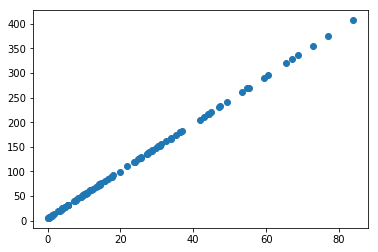

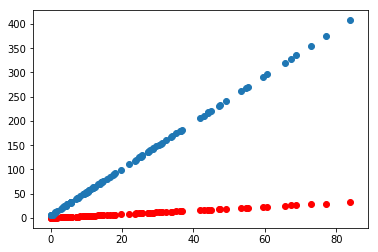

w:0.38583857074578237, b:0.009835296473323738
loss is 9467.93291652646


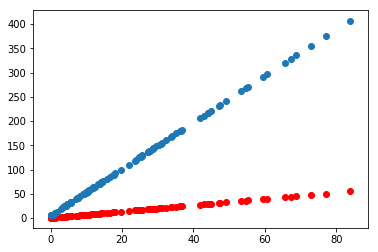

w:0.6533248358604007, b:0.018275020259606038
loss is 8386.175047556993


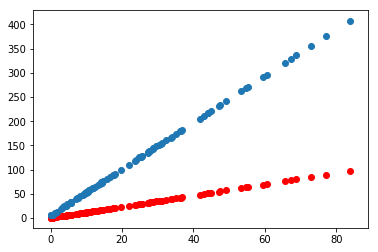

w:1.1575118959642865, b:0.02921483761007261
loss is 6526.068627936409


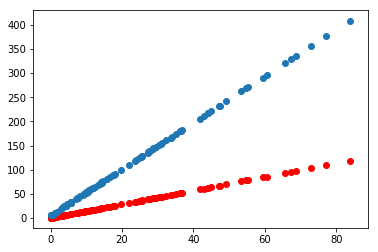

w:1.4204140000276007, b:0.03660292231257735
loss is 5648.462875525998


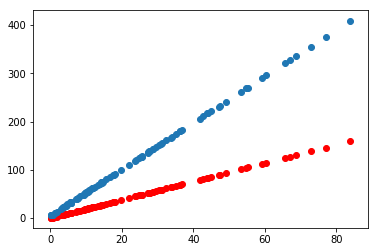

w:1.8952886341230104, b:0.04699090326876529
loss is 4224.1549987491435


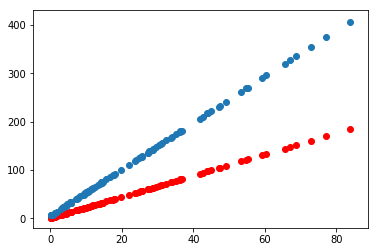

w:2.1993028265920147, b:0.05483381478320271
loss is 3420.804839797801


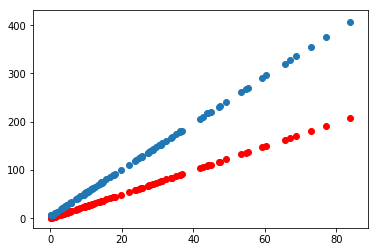

w:2.473605139785022, b:0.06173192180872515
loss is 2768.723881228204


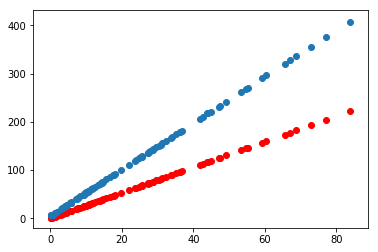

w:2.6430729261263273, b:0.06665914447781374
loss is 2400.3091670887143


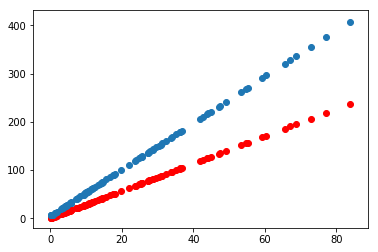

w:2.8353867263858046, b:0.0717992031459056
loss is 2014.1619411770066


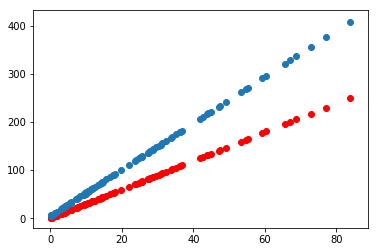

w:2.9797835069581406, b:0.07624031062861515
loss is 1746.497325021946


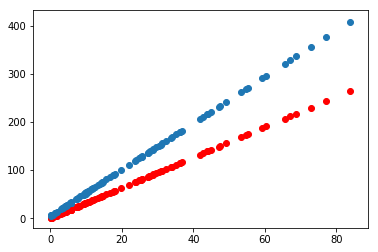

w:3.157287668462712, b:0.08073809723771919
loss is 1443.7124190271895


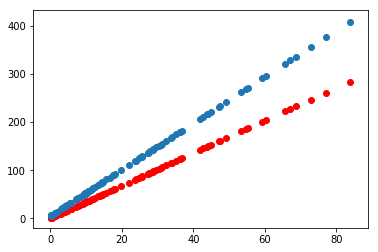

w:3.3862869722298496, b:0.08583476257133683
loss is 1095.8015744783913


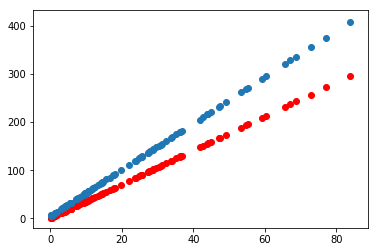

w:3.5284546387922497, b:0.08963514772825887
loss is 903.9833427129006


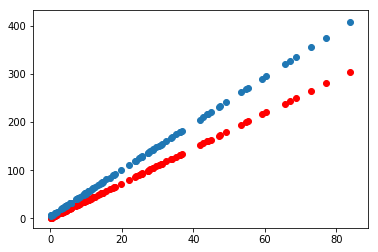

w:3.639642474309574, b:0.09275295700370426
loss is 766.8785029964397


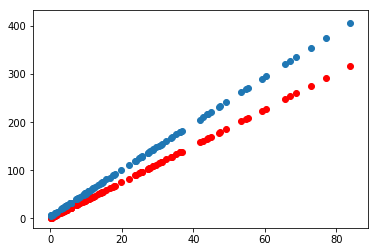

w:3.775749750398411, b:0.0962270816640855
loss is 614.4922957769217


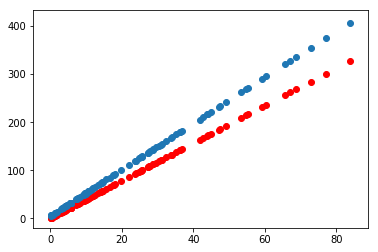

w:3.9053205025366533, b:0.09949507216302148
loss is 485.21133539680596


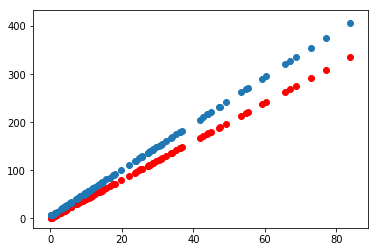

w:4.003924559583993, b:0.10208817655822455
loss is 397.1425842461503


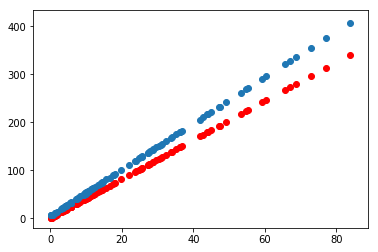

w:4.066582793005697, b:0.1041477243509074
loss is 345.8038464395205


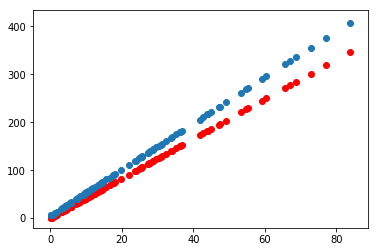

w:4.129952109559062, b:0.10616653902701825
loss is 297.5474156265481


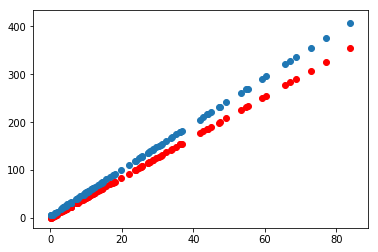

w:4.220173299189358, b:0.10852457648006818
loss is 235.20891838922137


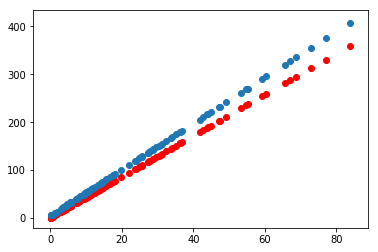

w:4.286296354878701, b:0.11035005648927633
loss is 194.26028317384404


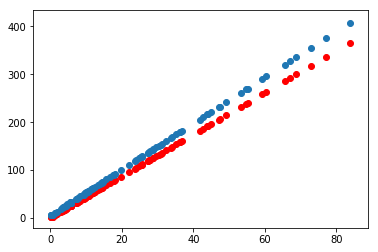

w:4.353705984967088, b:0.11221470692490046
loss is 156.64305710307963


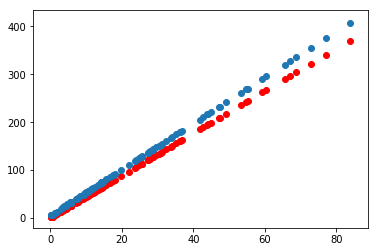

w:4.418638668597577, b:0.11382612608854435
loss is 124.35168883031652


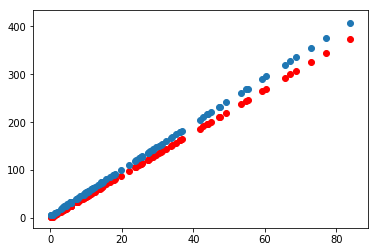

w:4.4588875509078365, b:0.11517466685283398
loss is 106.2724907151225


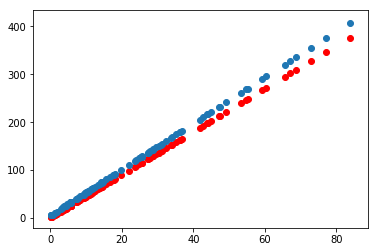

w:4.4937655819137525, b:0.1163850320245536
loss is 91.8073612881039


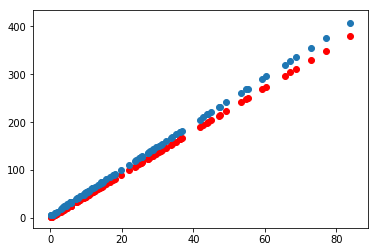

w:4.5293204823280115, b:0.11756108969530886
loss is 78.21105666924572


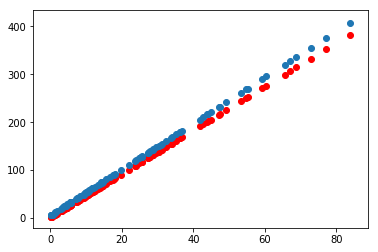

w:4.568201519400082, b:0.11869024517031335
loss is 64.6721212070067


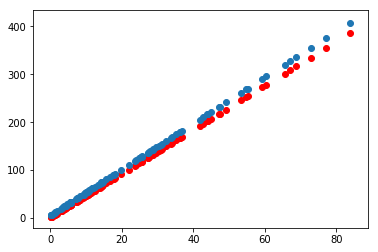

w:4.598489385323407, b:0.11969965753826009
loss is 55.0850681555618


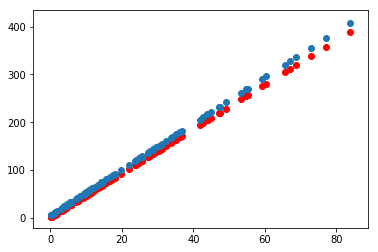

w:4.638830046875407, b:0.12076510852509312
loss is 43.625493841700205


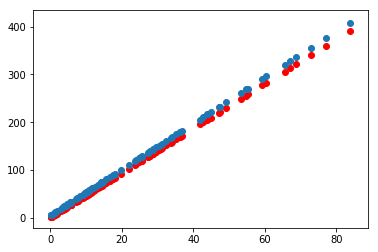

w:4.662980348540521, b:0.12162036071793705
loss is 37.47758961913146


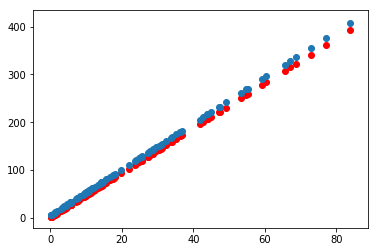

w:4.683827783662377, b:0.12241512234896172
loss is 32.60045003982123


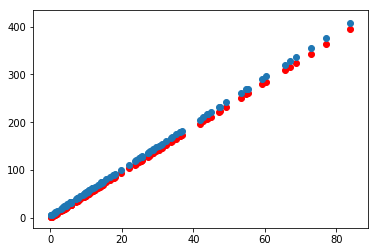

w:4.704975615403973, b:0.12316310667305252
loss is 28.060971017826528


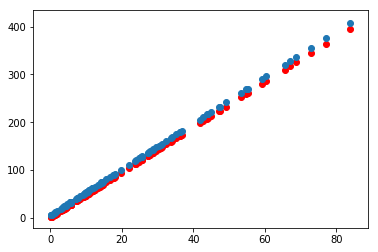

w:4.722591038612436, b:0.12386075236986537
loss is 24.592513989747253


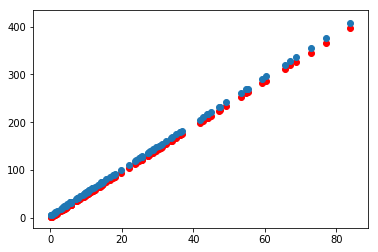

w:4.742937777627691, b:0.12455046516897976
loss is 20.941451017021876


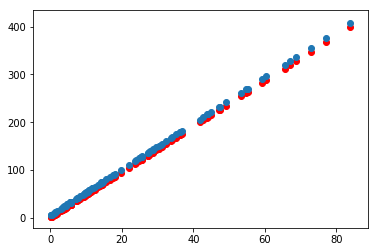

w:4.7609235311127875, b:0.1251833930000815
loss is 18.030200222014944


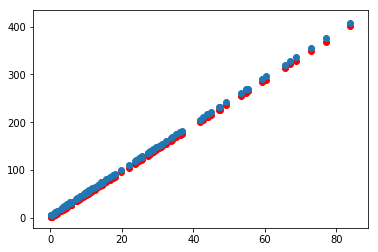

w:4.778352260350213, b:0.12579809931099617
loss is 15.492284697564578


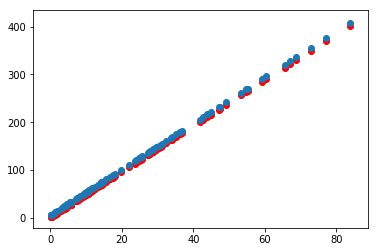

w:4.7936786467180985, b:0.12636652482685803
loss is 13.490684695649081


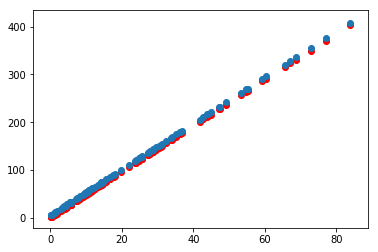

w:4.804103811936126, b:0.12688853234228337
loss is 12.25169007154777


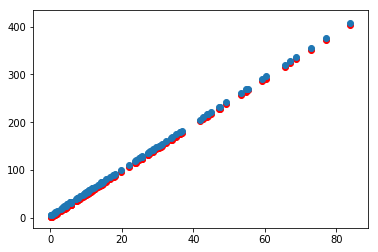

w:4.8156401735870755, b:0.12738421255043617
loss is 10.997340113679094


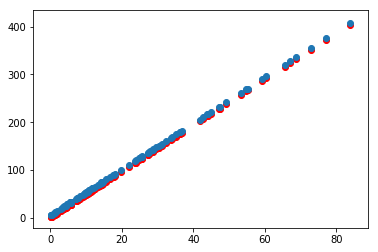

w:4.823760150637422, b:0.12785453041652742
loss is 10.187166296237834


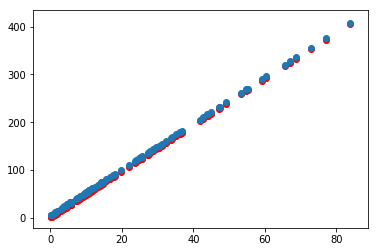

w:4.83482394554997, b:0.1282970853461077
loss is 9.18159648559191


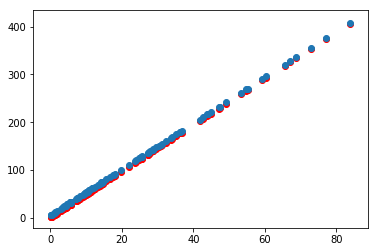

w:4.843938699916086, b:0.12872272343128346
loss is 8.437329191670973


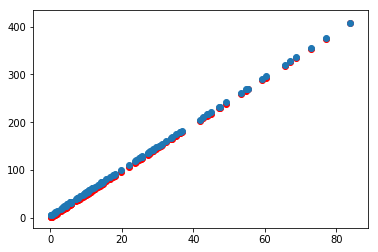

w:4.851742627760334, b:0.1291104042594989
loss is 7.860618703937966


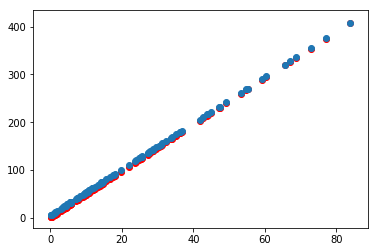

w:4.858541042536422, b:0.12951220134968963
loss is 7.403558380624877


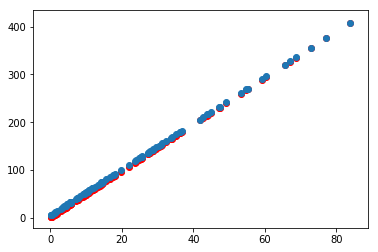

w:4.865067925917521, b:0.129895817278077
loss is 7.004710807537049


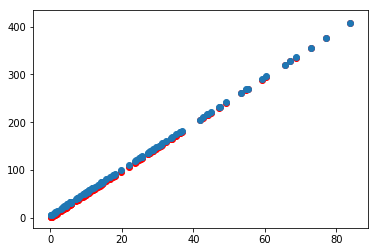

w:4.870862979194775, b:0.13026532193384424
loss is 6.683285224906597


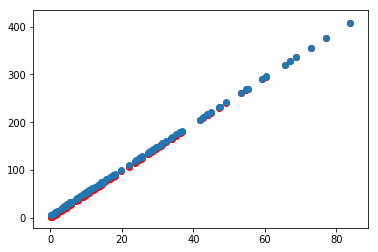

w:4.875734715355259, b:0.13055505715857146
loss is 6.437016114617455


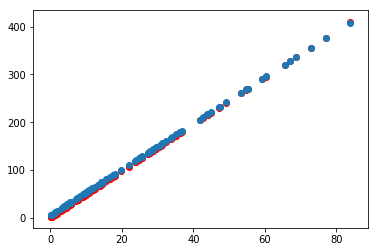

w:4.881108600698116, b:0.13090259586907543
loss is 6.190565845914886


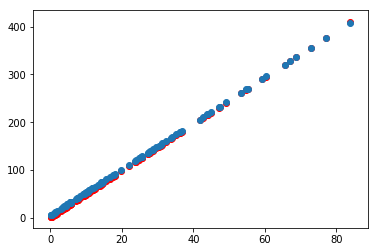

w:4.885287322718507, b:0.1312109969174037
loss is 6.017150437474171


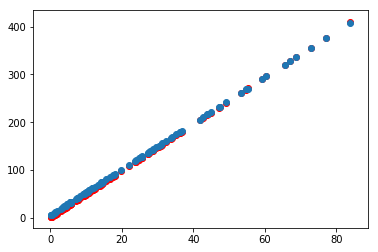

w:4.888467982059918, b:0.13156632904770613
loss is 5.895552976218686


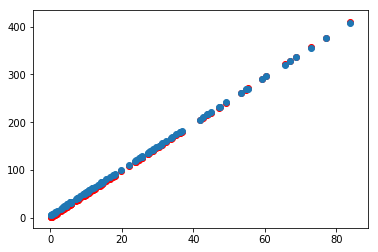

w:4.892211297567082, b:0.13188053992650559
loss is 5.764684303205956


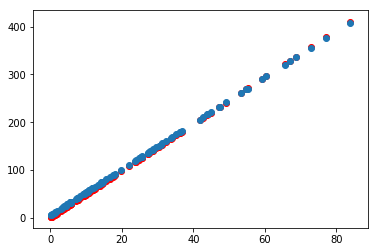

w:4.8953816775044245, b:0.13218645009640412
loss is 5.663813695174739


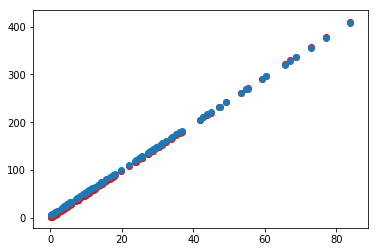

w:4.899308639719387, b:0.1324936669230869
loss is 5.551894341117641


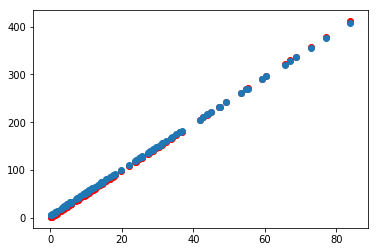

w:4.90273734047364, b:0.13282050360534095
loss is 5.465614960306365


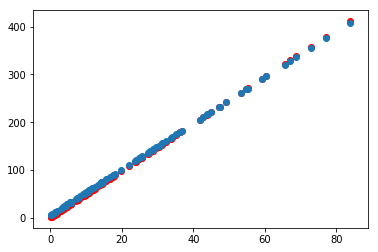

w:4.904533826190596, b:0.13309171881020385
loss is 5.424465390471309


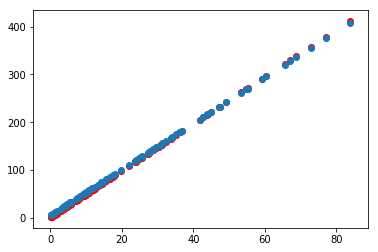

w:4.906968940905078, b:0.13333692051224114
loss is 5.3737574020137435


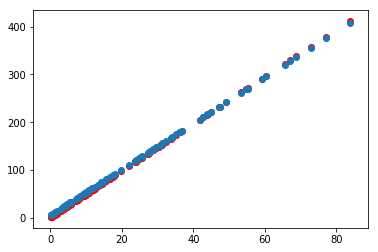

w:4.908493505268007, b:0.1335594133802988
loss is 5.344614138621755


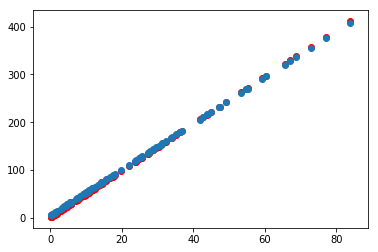

w:4.911060983940241, b:0.13381376348476634
loss is 5.30067973959025


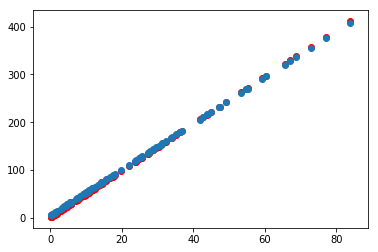

w:4.911216103634468, b:0.1340260674819796
loss is 5.297732549118349


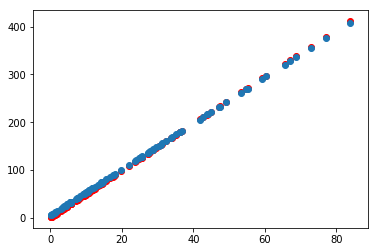

w:4.913508458781989, b:0.13428143000088283
loss is 5.26390273881947


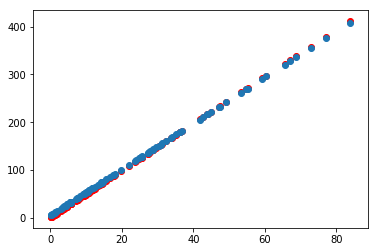

w:4.914918960804868, b:0.13453115406379235
loss is 5.245271180366451


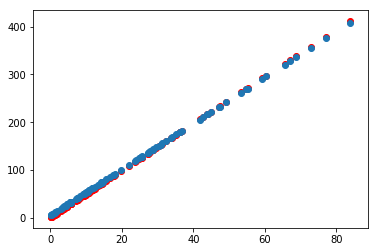

w:4.915659757743711, b:0.13476754926874954
loss is 5.235972645096203


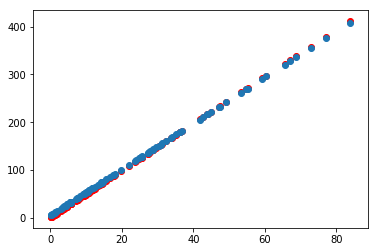

w:4.916498242297042, b:0.1349869055235374
loss is 5.226177513877698


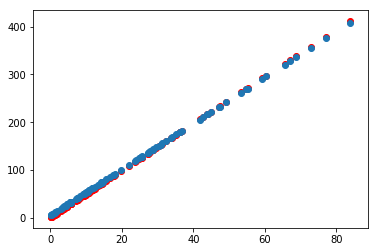

w:4.918311812132755, b:0.13527313318173298
loss is 5.2076580177552385


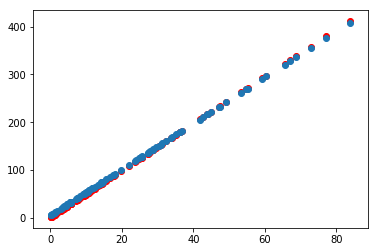

w:4.920925191029546, b:0.13551503824579497
loss is 5.186695430426694


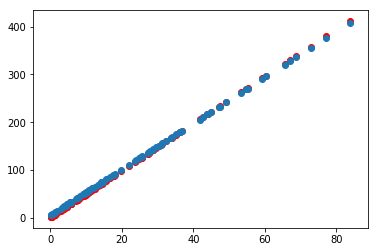

w:4.921067825761022, b:0.13572622881157057
loss is 5.185287292256936


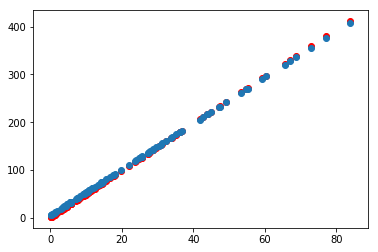

w:4.922003072406825, b:0.1359758667679384
loss is 5.179076557357938


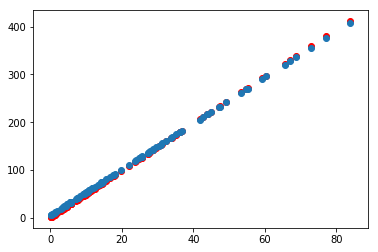

w:4.922246335963533, b:0.1361792650634929
loss is 5.177286811147022


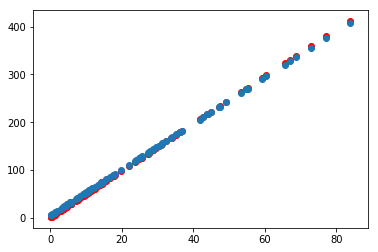

w:4.924081633914534, b:0.13644602632547811
loss is 5.1683651144294345


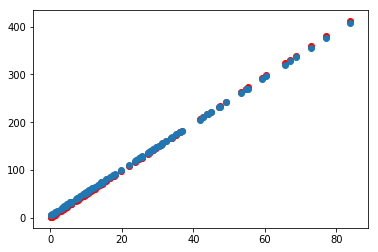

w:4.925365072945827, b:0.13667108534392491
loss is 5.163889904328252


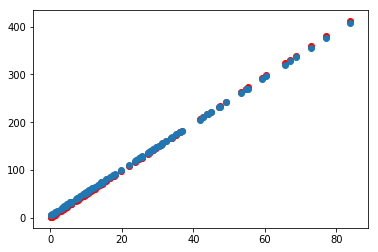

w:4.9247959525907605, b:0.13689850788024754
loss is 5.16497946621895


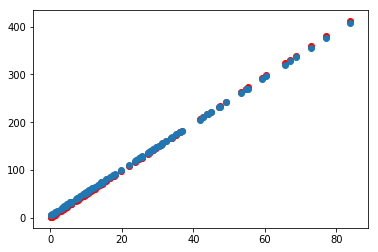

w:4.92512651739533, b:0.137080043002549
loss is 5.163635927795327


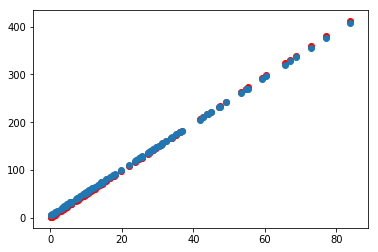

w:4.926061024795584, b:0.13732103822101802
loss is 5.160974323102326


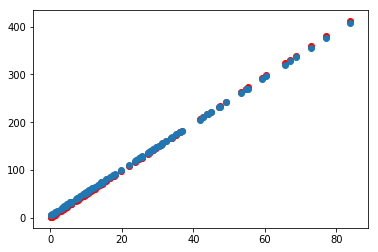

w:4.926449908541236, b:0.13754226672694983
loss is 5.159848801514919


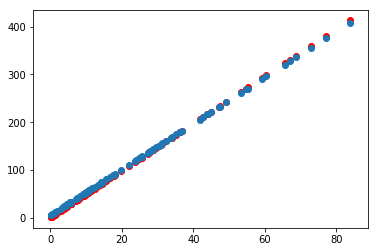

w:4.928776088766446, b:0.1377963719391418
loss is 5.158303408966195


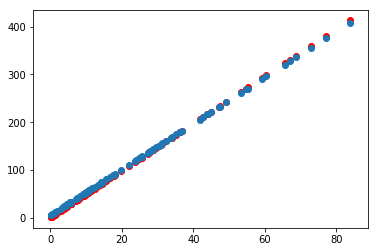

w:4.928772693172496, b:0.13800907615988342
loss is 5.15786120950712


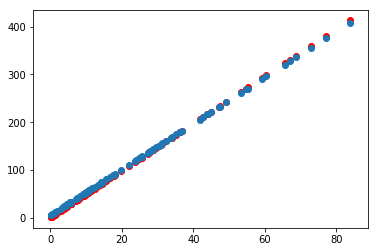

w:4.928697909556198, b:0.13821364794431276
loss is 5.1573927769118635


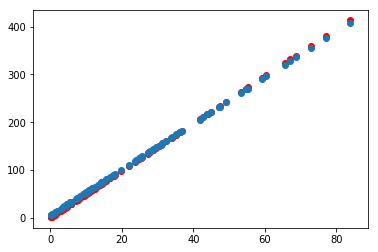

w:4.930007128086462, b:0.13844116156700698
loss is 5.158460849735483


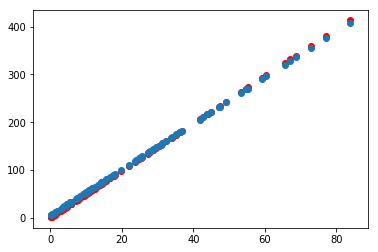

w:4.930113858059078, b:0.13867236952745246
loss is 5.158184425140717


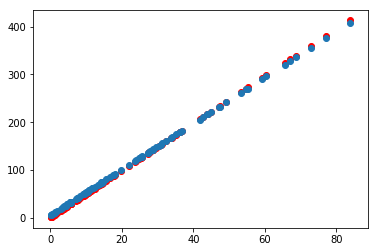

w:4.931331304083035, b:0.1389091179269668
loss is 5.160674102257158


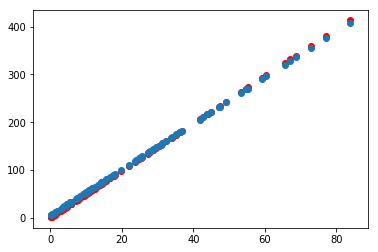

w:4.930554600416301, b:0.13907181849970496
loss is 5.1582914331481104


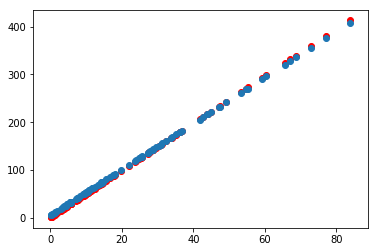

w:4.93089763703029, b:0.139301285238757
loss is 5.158667931415008


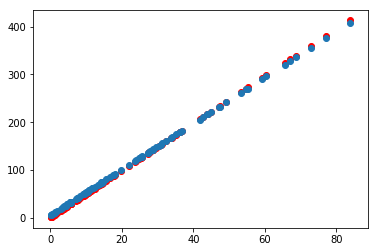

w:4.931068772854284, b:0.1394952793045964
loss is 5.15873720882079


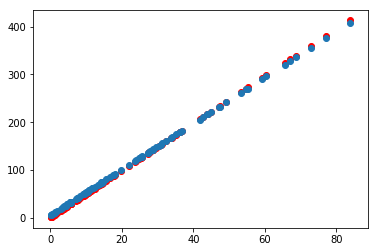

w:4.9306290009049905, b:0.13968159869738928
loss is 5.157229620305332


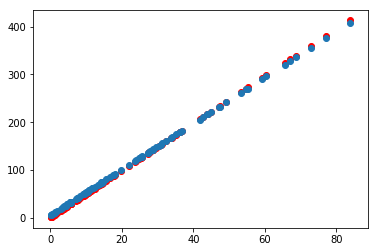

w:4.931461388688169, b:0.13992660669893014
loss is 5.159030918929276


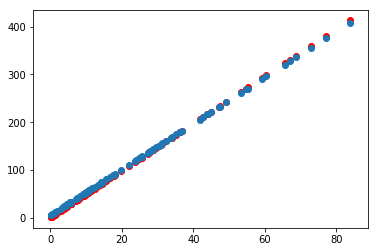

w:4.927979825027907, b:0.1401049681282785
loss is 5.1532743362033555


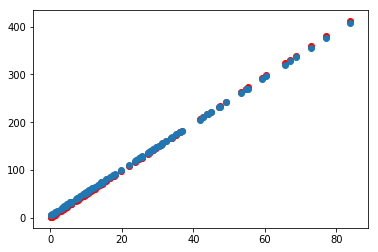

w:4.925535396993028, b:0.14027398401935406
loss is 5.155756219524417


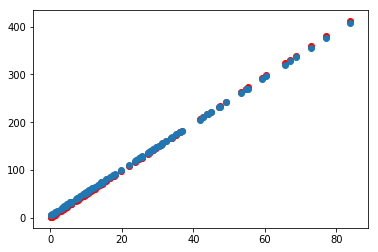

w:4.926735791831184, b:0.14053604451755994
loss is 5.153126773390999


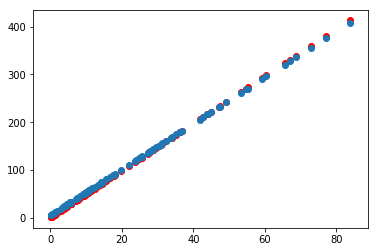

w:4.928124154453922, b:0.14079521534667583
loss is 5.151841062531003


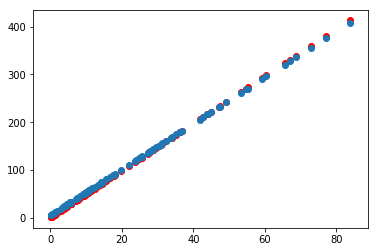

w:4.9282894154181776, b:0.14102587544031395
loss is 5.151391728553653


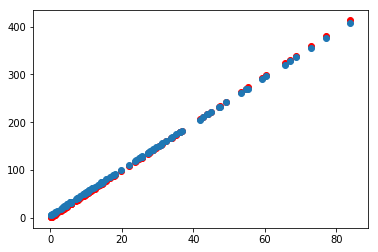

w:4.927601653512453, b:0.14124020434090032
loss is 5.150980536361756


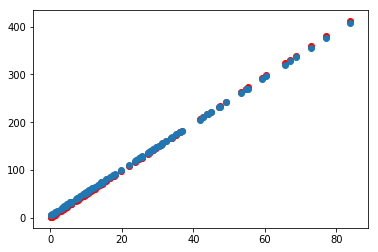

w:4.926471245690365, b:0.14145032276795583
loss is 5.151532516925631


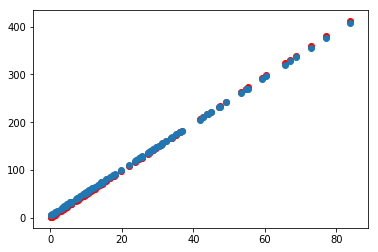

w:4.9256645940154336, b:0.14164448442572405
loss is 5.1525409581880055


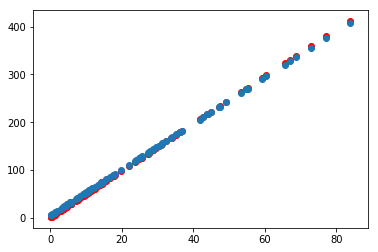

w:4.923933229690638, b:0.1418082563738343
loss is 5.157244211845051


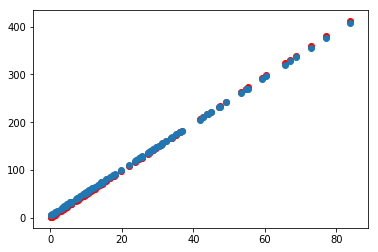

w:4.924852120788559, b:0.14203594587746332
loss is 5.153729929739706


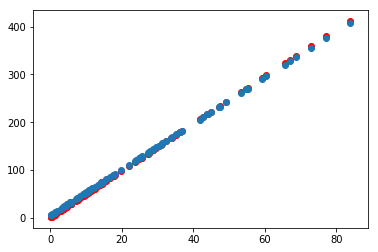

w:4.923825008882506, b:0.14226051717000876
loss is 5.156666337792375


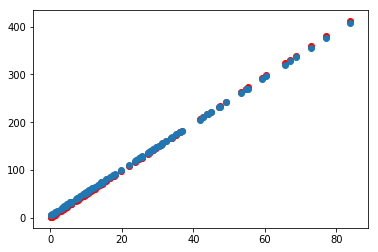

w:4.924711349136852, b:0.14251107812333308
loss is 5.153117286187003


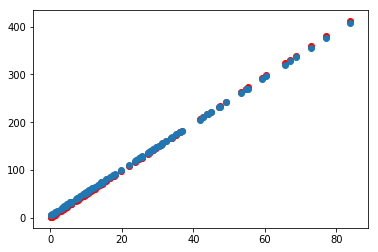

w:4.925684294600622, b:0.1427563267636724
loss is 5.150125296177805


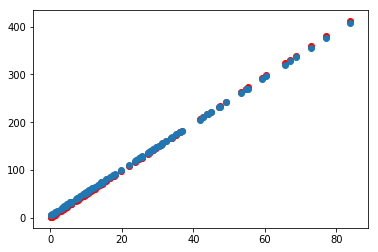

w:4.92439901688501, b:0.14291458052540365
loss is 5.153220405206605


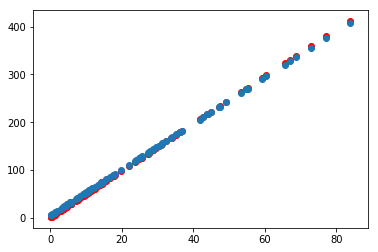

w:4.9237348974309585, b:0.14309374714326137
loss is 5.155196783152304


In [11]:
# lr = 0.0001   max_iter = 100     
if __name__ == '__main__':
    run()

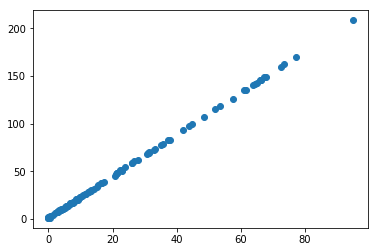

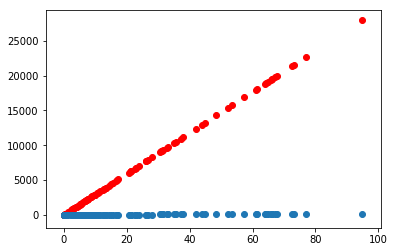

w:294.22532317601366, b:6.153511243871985
loss is 45872555.99526026


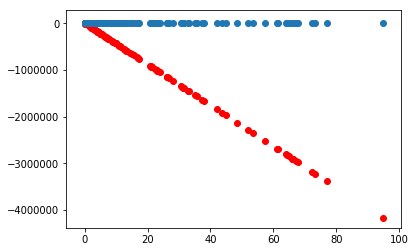

w:-43887.26217101902, b:-843.2779323663035
loss is 1036164737173.6449


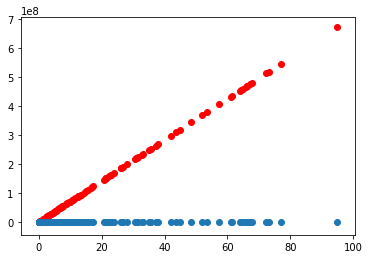

w:7062454.541486038, b:134277.25733289207
loss is 2.6829669282317664e+16


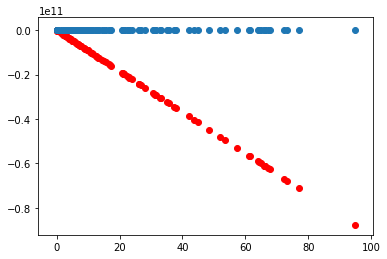

w:-923608784.3008133, b:-19028819.63293546
loss is 4.588921342060361e+20


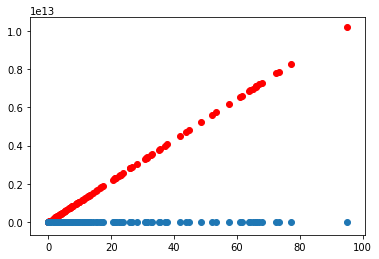

w:107493911479.22235, b:2349012795.803929
loss is 6.216214734364592e+24


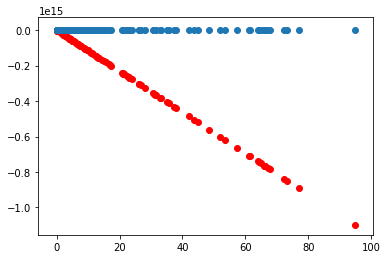

w:-11568634327331.277, b:-255640187676.1514
loss is 7.199910983342482e+28


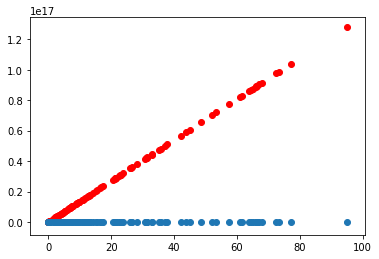

w:1347740712878140.8, b:28389427975980.438
loss is 9.771381765150731e+32


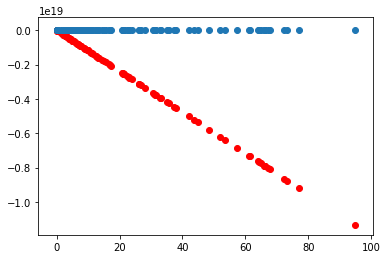

w:-1.194324948341607e+17, b:-3003737606007341.5
loss is 7.67478132061655e+36


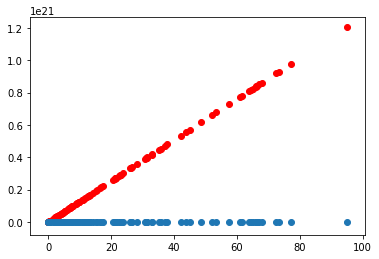

w:1.2684742512961923e+19, b:2.8370753964753395e+17
loss is 8.656281197017079e+40


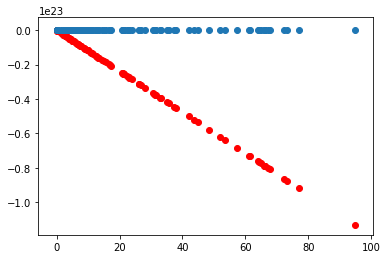

w:-1.191470120326898e+21, b:-2.805387332362016e+19
loss is 7.637597936535386e+44


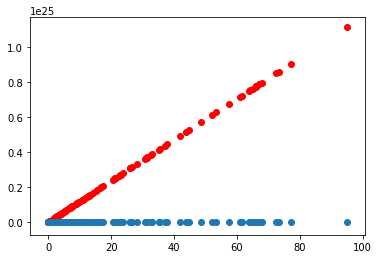

w:1.1749089873238727e+23, b:2.7856993232131216e+21
loss is 7.426805638951117e+48


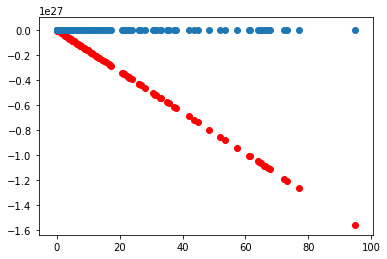

w:-1.6415162571943858e+25, b:-3.143591180277566e+23
loss is 1.4494300334683568e+53


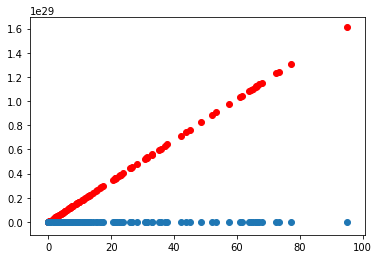

w:1.6964752426375598e+27, b:3.888000222763955e+25
loss is 1.548365897836627e+57


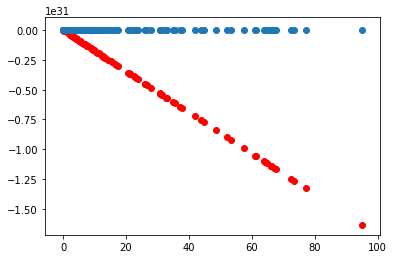

w:-1.7229041675492723e+29, b:-3.7766555794078406e+27
loss is 1.596915028604949e+61


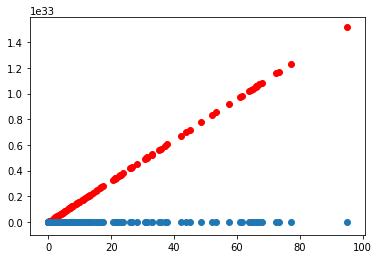

w:1.596726126873517e+31, b:3.806789505280067e+29
loss is 1.371693142542829e+65


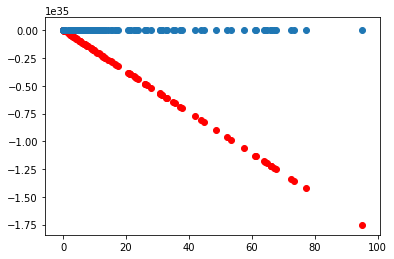

w:-1.846441072656557e+33, b:-3.8924587563974447e+31
loss is 1.834064066676993e+69


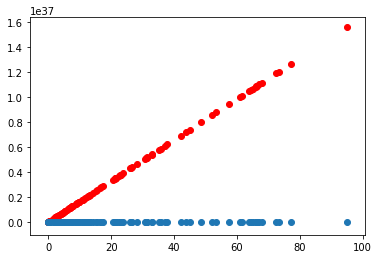

w:1.643924055068817e+35, b:3.7509363628554377e+33
loss is 1.4539186993744573e+73


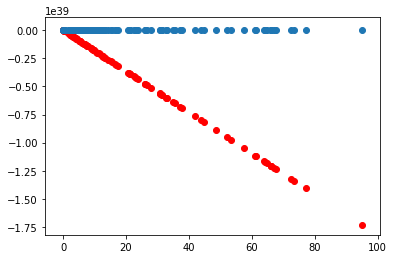

w:-1.8238837147211731e+37, b:-3.825730150779803e+35
loss is 1.7895172503283355e+77


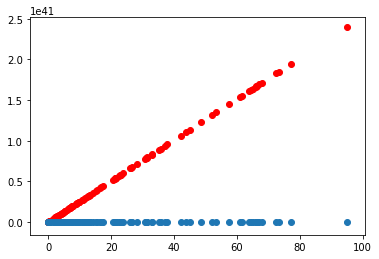

w:2.5233793157484262e+39, b:5.087334381883469e+37
loss is 3.425241317947905e+81


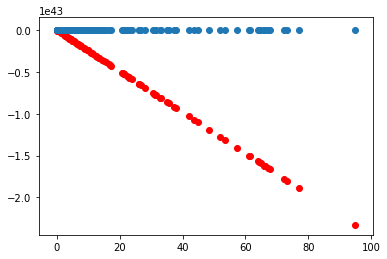

w:-2.4526683010578193e+41, b:-5.741046970070135e+39
loss is 3.23642455683719e+85


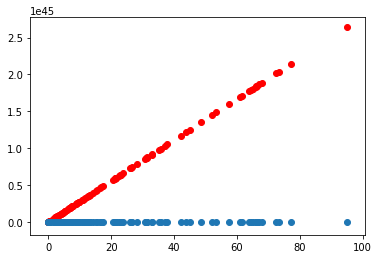

w:2.780033471427571e+43, b:5.823229360904864e+41
loss is 4.157584586972076e+89


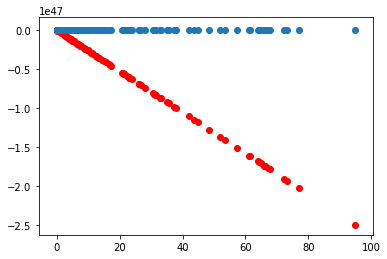

w:-2.6321053254444665e+45, b:-6.030730743444694e+43
loss is 3.7272194217216387e+93


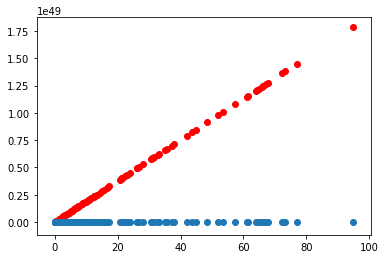

w:1.879758122038948e+47, b:4.7025990425022705e+45
loss is 1.9011763813959833e+97


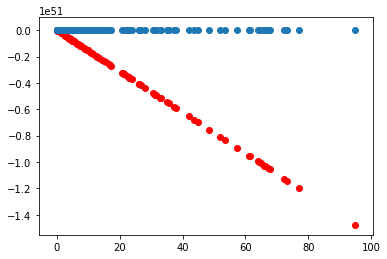

w:-1.5557865258053305e+49, b:-3.902145839204559e+47
loss is 1.3023259914226723e+101


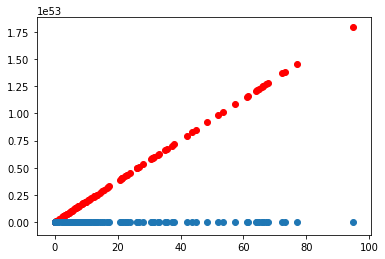

w:1.8906298082771694e+51, b:3.9795958517964316e+49
loss is 1.9228968777332848e+105


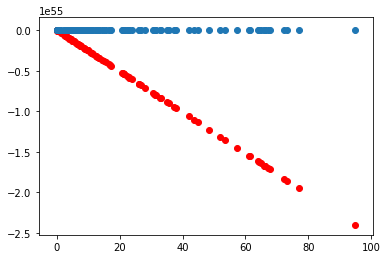

w:-2.529153859117485e+53, b:-5.035428164270257e+51
loss is 3.4408981467359727e+109


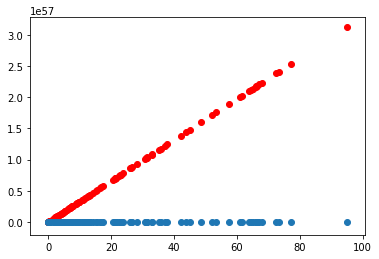

w:3.286744984211828e+55, b:6.4288569159613504e+53
loss is 5.810943931883827e+113


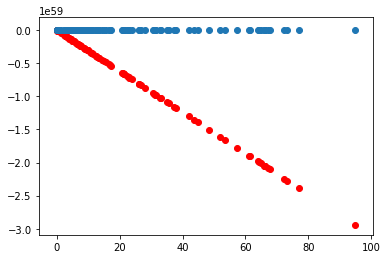

w:-3.0991173035180546e+57, b:-6.814053930174957e+55
loss is 5.16698100813077e+117


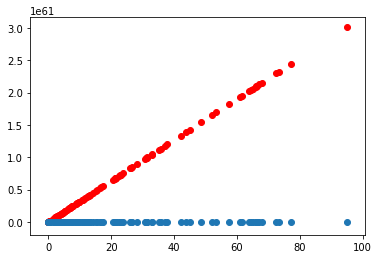

w:3.169387961453784e+59, b:7.433780985837174e+57
loss is 5.404301435111344e+121


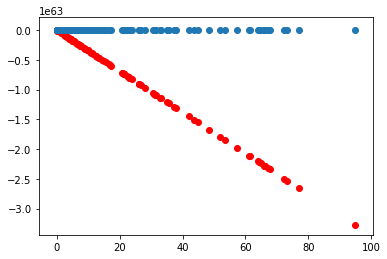

w:-3.44992796164068e+61, b:-7.765316153521642e+59
loss is 6.403107741914168e+125


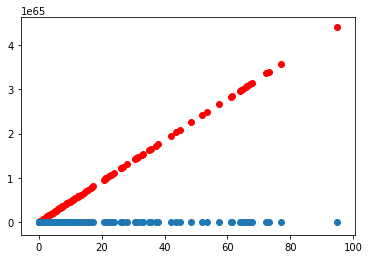

w:4.640181342788416e+63, b:9.159443914968807e+61
loss is 1.1582118075104513e+130


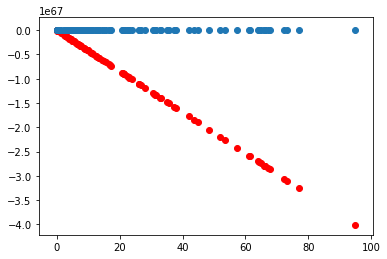

w:-4.2231806307779665e+65, b:-9.206131380627054e+63
loss is 9.594814286383935e+133


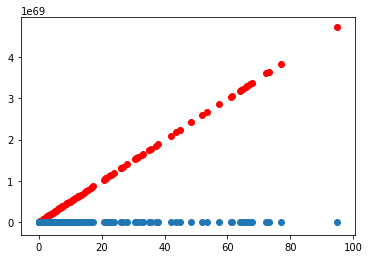

w:4.981384867097668e+67, b:1.0212292961590274e+66
loss is 1.3348509049356154e+138


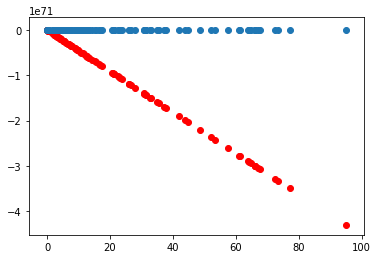

w:-4.53951462298804e+69, b:-1.0194251679308239e+68
loss is 1.1086350561389532e+142


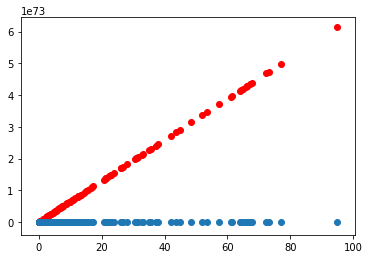

w:6.464419394402977e+71, b:1.220972550858108e+70
loss is 2.2478168730863232e+146


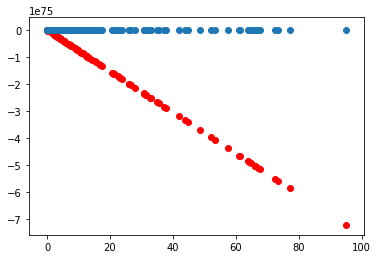

w:-7.612823020487787e+73, b:-1.7063021660709442e+72
loss is 3.1178873107444746e+150


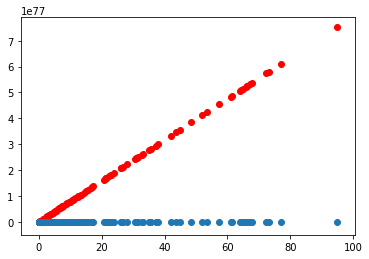

w:7.9203534577885e+75, b:1.689035121720176e+74
loss is 3.3747171032612257e+154


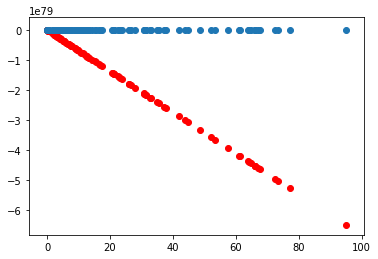

w:-6.843350233368831e+77, b:-1.578385870932538e+76
loss is 2.51952611698455e+158


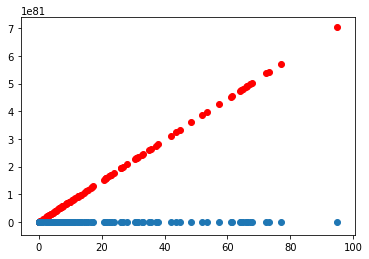

w:7.407779070509383e+79, b:1.5546374289196943e+78
loss is 2.9520101523459627e+162


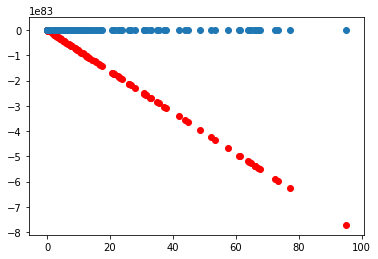

w:-8.130470849044592e+81, b:-1.7479014690400797e+80
loss is 3.5561734027848485e+166


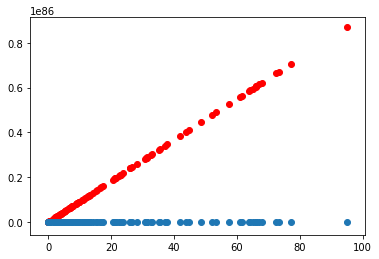

w:9.153756448085855e+83, b:1.9234703170253436e+82
loss is 4.5075547579043397e+170


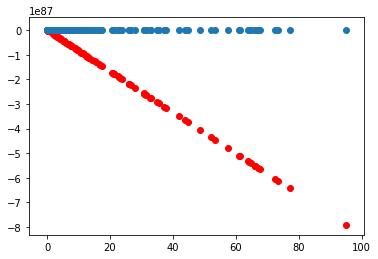

w:-8.342901732255677e+85, b:-2.04886500742457e+84
loss is 3.7449325372437822e+174


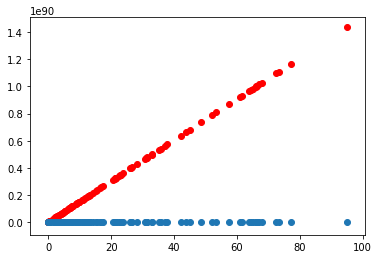

w:1.5136993551551198e+88, b:2.829823351603594e+86
loss is 1.2324731354848033e+179


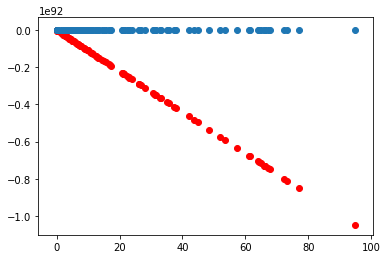

w:-1.1050277985009615e+90, b:-2.970502739649185e+88
loss is 6.57052914351154e+182


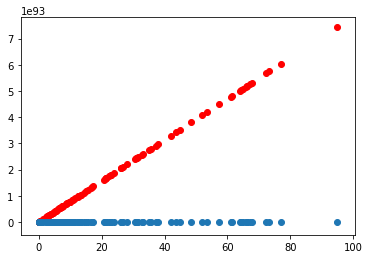

w:7.82624550083448e+91, b:2.046365356129416e+90
loss is 3.295694195813262e+186


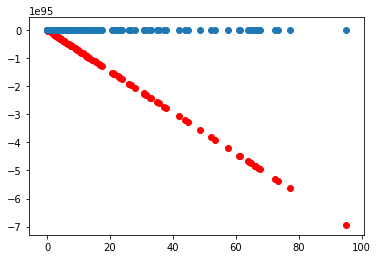

w:-7.309730658570559e+93, b:-1.8176999799493235e+92
loss is 2.874871007592633e+190


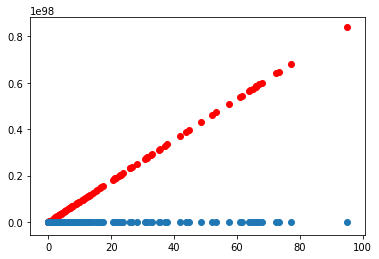

w:8.83794327657274e+95, b:1.9786320533025307e+94
loss is 4.202143507864112e+194


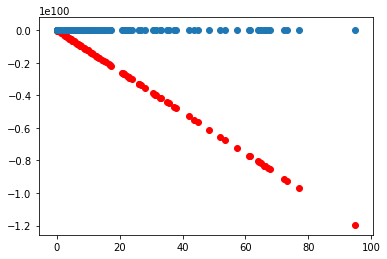

w:-1.2597254468158318e+98, b:-2.530906429990334e+96
loss is 8.53643567865054e+198


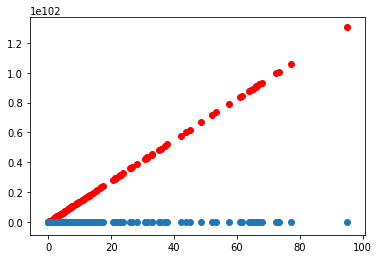

w:1.3750488868080272e+100, b:2.8705529858655533e+98
loss is 1.0171288635475652e+203


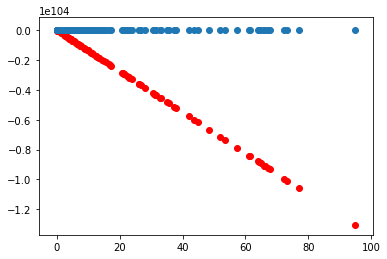

w:-1.3741260263485017e+102, b:-2.9443148746773175e+100
loss is 1.0157885405880239e+207


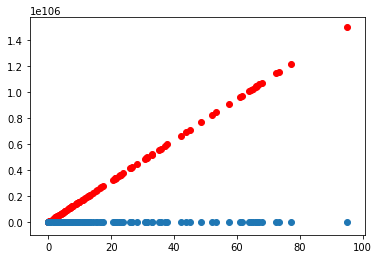

w:1.5819649650395994e+104, b:3.431582937095587e+102
loss is 1.3463220015874514e+211


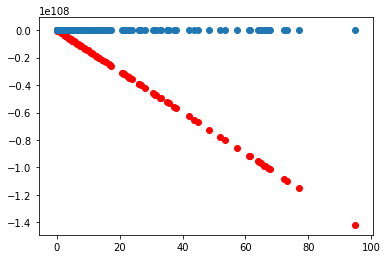

w:-1.494419461080726e+106, b:-3.48133304217435e+104
loss is 1.2015193073297612e+215


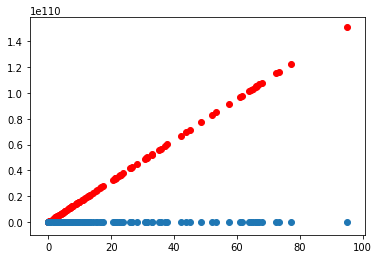

w:1.5897202811646015e+108, b:3.380555868642491e+106
loss is 1.3595291754013362e+219


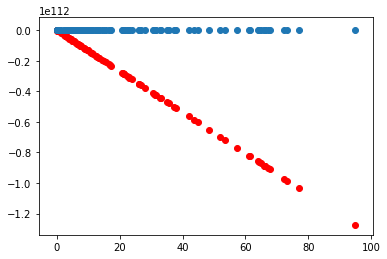

w:-1.3417361333981884e+110, b:-3.360526659828783e+108
loss is 9.686196038006249e+222


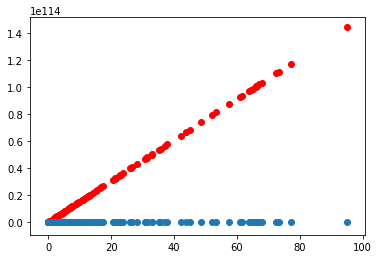

w:1.5170154157031198e+112, b:3.18704056958364e+110
loss is 1.238004467031405e+227


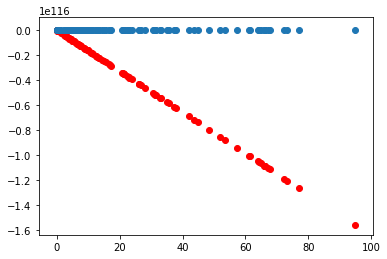

w:-1.639003639122958e+114, b:-3.6046612321944576e+112
loss is 1.44517614389555e+231


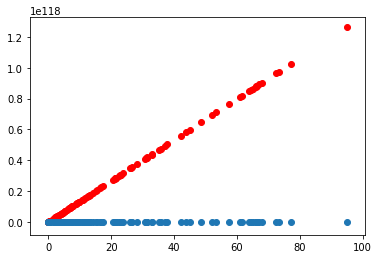

w:1.3291095562471685e+116, b:3.2439051146559973e+114
loss is 9.504481287622994e+234


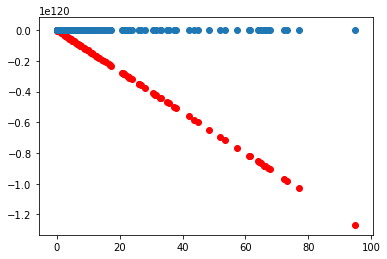

w:-1.3355040066159367e+118, b:-2.923816430136217e+116
loss is 9.59509847225468e+238


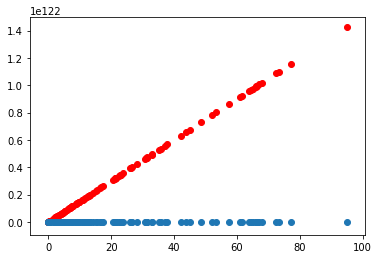

w:1.5000316812620256e+120, b:3.0148925117782014e+118
loss is 1.210391267060349e+243


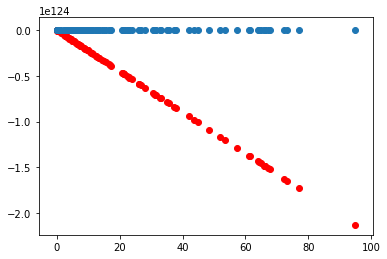

w:-2.244441432440855e+122, b:-4.3942732467155525e+120
loss is 2.7097646571665852e+247


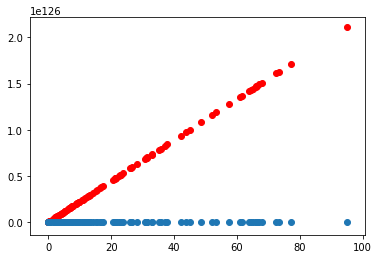

w:2.221989389813382e+124, b:4.8823718123060364e+122
loss is 2.6561006545289415e+251


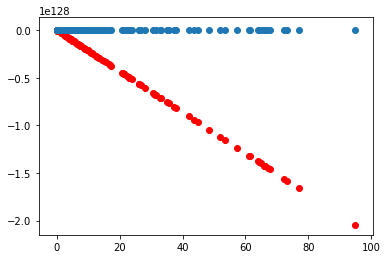

w:-2.154500441639291e+126, b:-4.898660611782888e+124
loss is 2.4972859440225283e+255


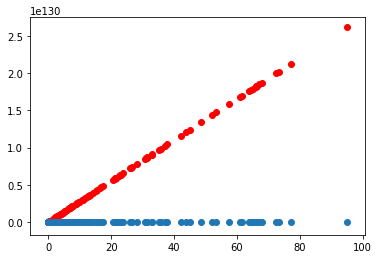

w:2.7580166713648e+128, b:5.447677527904188e+126
loss is 4.0917783254968547e+259


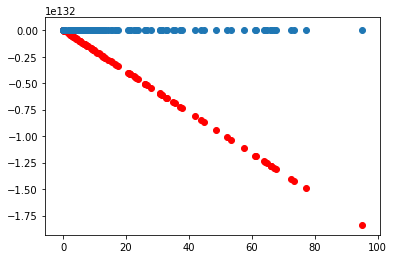

w:-1.9365225653792763e+130, b:-5.3826392506364424e+128
loss is 2.0179780718549708e+263


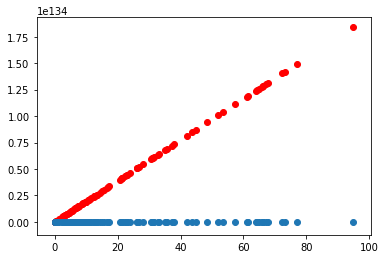

w:1.9370200259381823e+132, b:4.532243569586739e+130
loss is 2.0186261518882799e+267


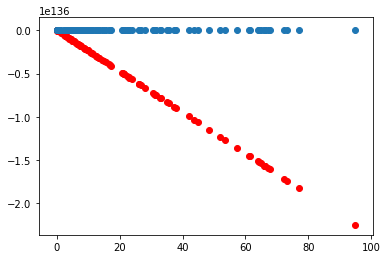

w:-2.3669683146172314e+134, b:-5.155011070257018e+132
loss is 3.0139897104567686e+271


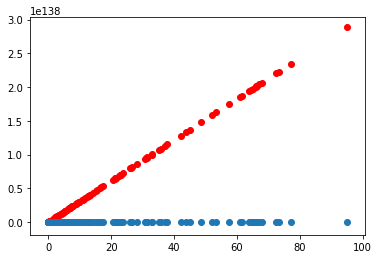

w:3.041281626783459e+136, b:6.135639230149508e+134
loss is 4.975533263848669e+275


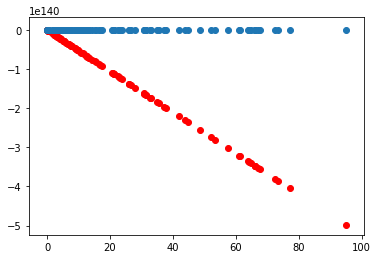

w:-5.249403126704547e+138, b:-8.97719763267381e+136
loss is 1.482134962222552e+280


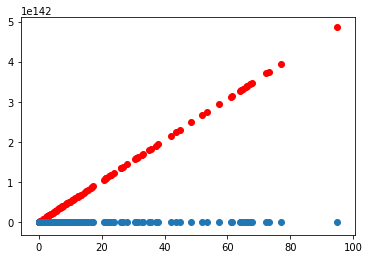

w:5.115438111531443e+140, b:1.2376922618295052e+139
loss is 1.4078892983928412e+284


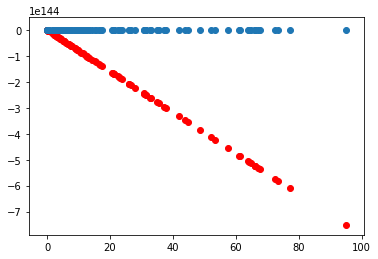

w:-7.916208136433689e+142, b:-1.4568528645153477e+141
loss is 3.370754141666735e+288


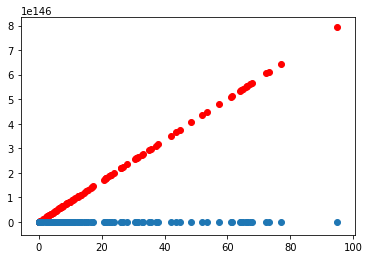

w:8.35167198376327e+144, b:1.795556476404507e+143
loss is 3.752307453875531e+292


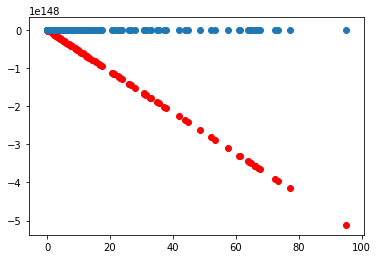

w:-5.386917666531903e+146, b:-1.445667117424332e+145
loss is 1.5614704053653803e+296


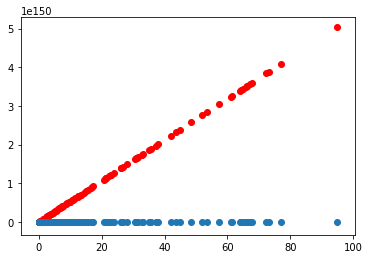

w:5.300809456607393e+148, b:1.1605685333395526e+147
loss is 1.5116228735877287e+300


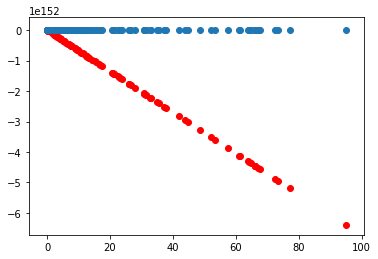

w:-6.736673512845424e+150, b:-1.3256267914799366e+149
loss is 2.4412255616302806e+304


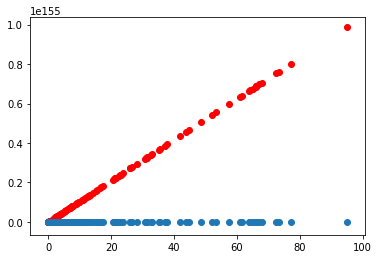

w:1.0389461501310806e+153, b:1.9490624782000432e+151


OverflowError: (34, 'Result too large')

In [13]:
# lr = 0.1   max_iter = 100   学习率太大，炸出去了 梯度边振荡边爆炸
if __name__ == '__main__':
    run()

# loss变大就是不正常吗？不一定，因为真实的情况是高维的，所以在局部可能会上升

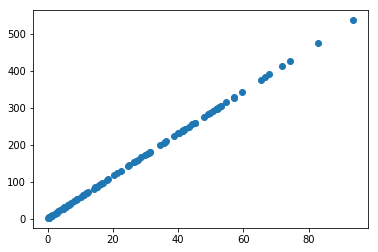

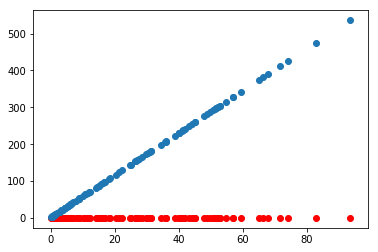

w:5.4265032034445215e-06, b:1.3583104373706805e-07
loss is 20346.302437590333


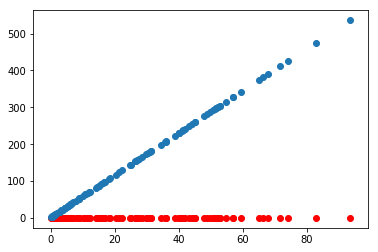

w:1.098047972788674e-05, b:2.809097605392331e-07
loss is 20346.263140474883


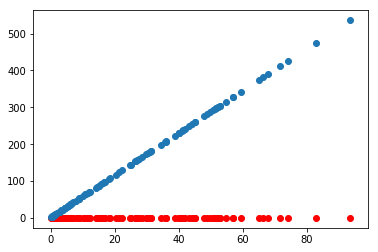

w:1.846835688487189e-05, b:4.4828921572350543e-07
loss is 20346.2101645544


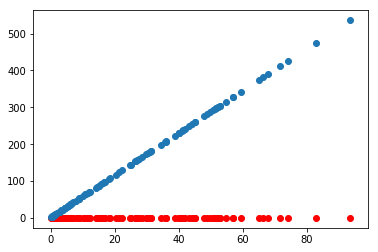

w:2.424969969829362e-05, b:5.896522205453498e-07
loss is 20346.16926032107


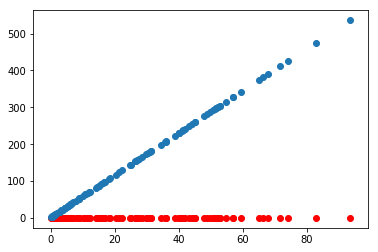

w:3.147495068035406e-05, b:7.492322990534244e-07
loss is 20346.11814287214


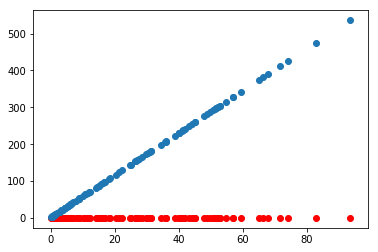

w:3.746194653169317e-05, b:8.959615468616571e-07
loss is 20346.07578364321


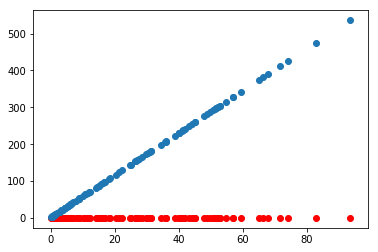

w:4.2929641334376775e-05, b:1.0221899093010908e-06
loss is 20346.037099836038


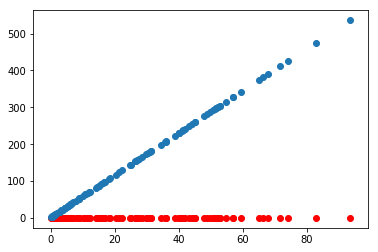

w:4.939506773365605e-05, b:1.1740718279414717e-06
loss is 20345.991356738075


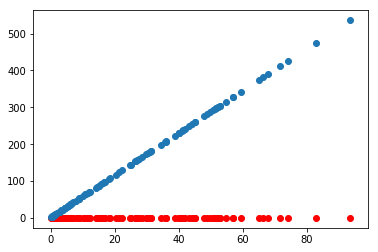

w:5.741466766152257e-05, b:1.345449721751405e-06
loss is 20345.93462055728


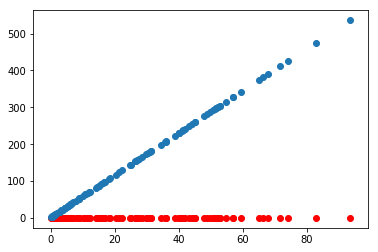

w:6.63468928945454e-05, b:1.5224371008803776e-06
loss is 20345.87143011152


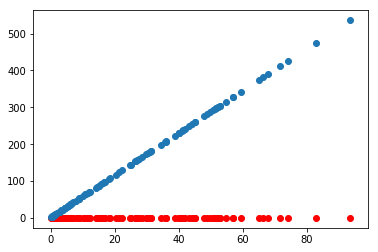

w:7.648494648302864e-05, b:1.7079841932129616e-06
loss is 20345.799711639458


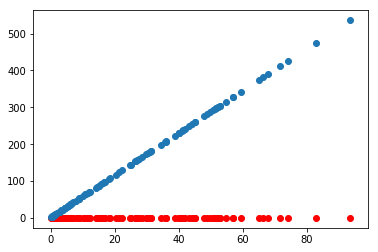

w:8.476110538847668e-05, b:1.8763577430649527e-06
loss is 20345.74116199396


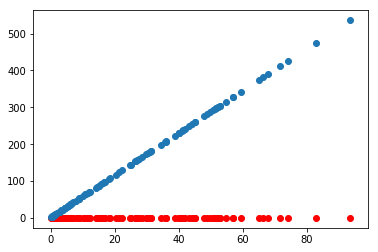

w:9.042537441530176e-05, b:2.025770245615774e-06
loss is 20345.701084829754


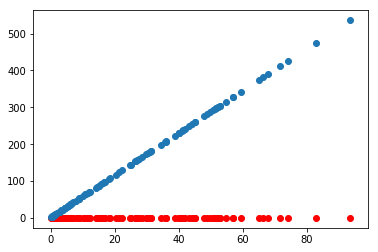

w:9.75716346365512e-05, b:2.1887161890515776e-06
loss is 20345.650526005786


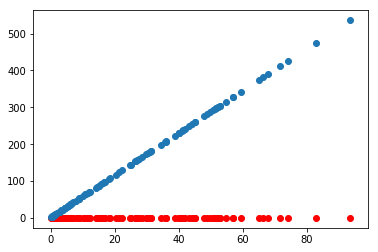

w:0.00010388530606434811, b:2.3377696855168615e-06
loss is 20345.605856887145


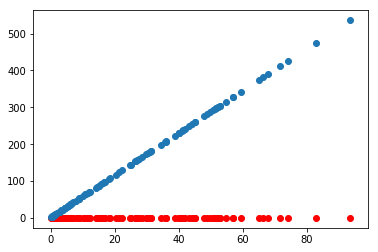

w:0.00011096389433707749, b:2.5042568499403543e-06
loss is 20345.555776151177


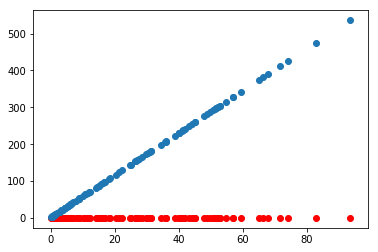

w:0.0001169160745918269, b:2.6335840450494037e-06
loss is 20345.513666431594


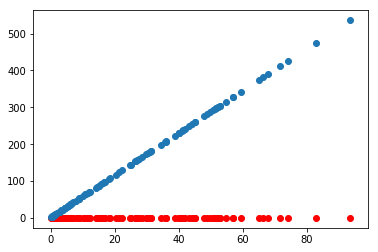

w:0.00012441097336206086, b:2.8140852638928895e-06
loss is 20345.460639773766


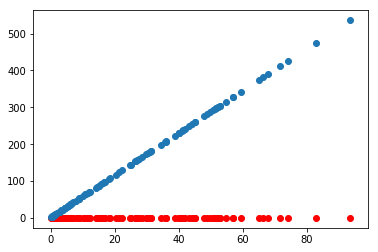

w:0.000128972133668057, b:2.933563882163319e-06
loss is 20345.428367933746


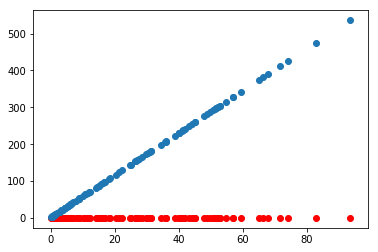

w:0.00013369365861210373, b:3.0653429280665903e-06
loss is 20345.394960211015


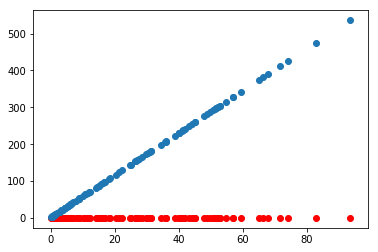

w:0.00014152163709733935, b:3.230672823622153e-06
loss is 20345.339580810072


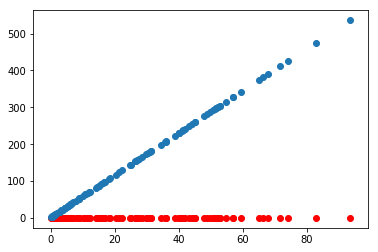

w:0.0001509047836619386, b:3.4154593844700434e-06
loss is 20345.273201502438


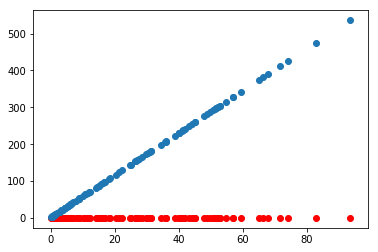

w:0.00015954532856687017, b:3.5918194699354796e-06
loss is 20345.212074712796


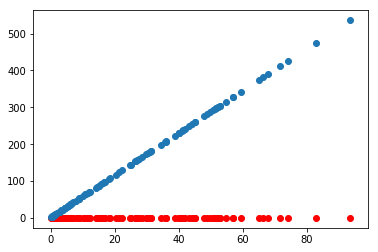

w:0.00016509482473328643, b:3.7263345294791598e-06
loss is 20345.17281199145


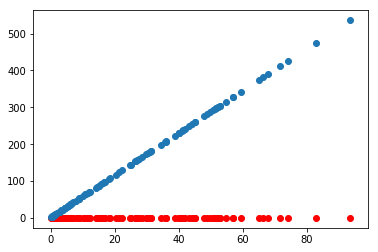

w:0.00017017901623357182, b:3.856966596893719e-06
loss is 20345.136840174986


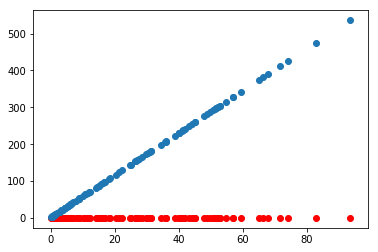

w:0.00017759979482289258, b:4.022120597246872e-06
loss is 20345.08434053649


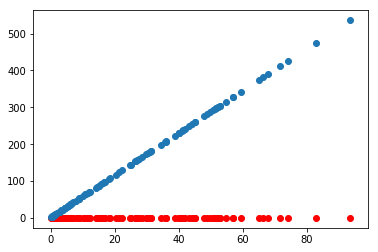

w:0.0001831266334918904, b:4.1624272685345536e-06
loss is 20345.045237243572


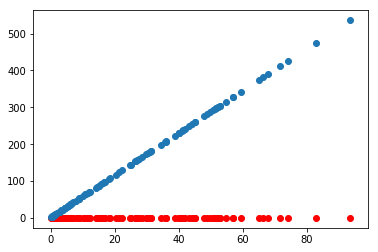

w:0.00019018028644163837, b:4.320512014262825e-06
loss is 20344.99533483944


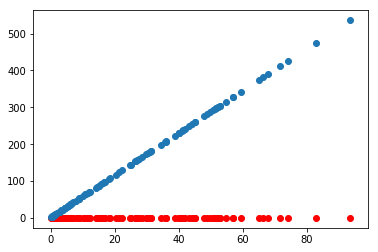

w:0.0001968795011419867, b:4.475775374712602e-06
loss is 20344.947939227786


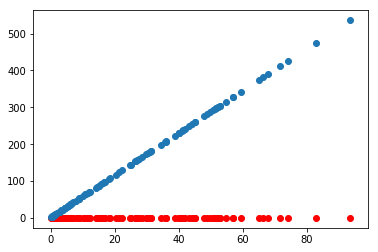

w:0.00020399842777421025, b:4.6372705375036126e-06
loss is 20344.89757484738


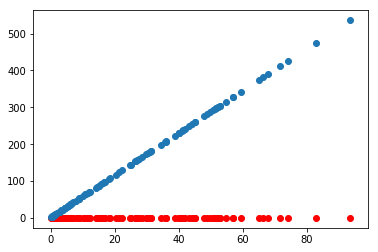

w:0.00021138385119227738, b:4.795879295791018e-06
loss is 20344.84532654715


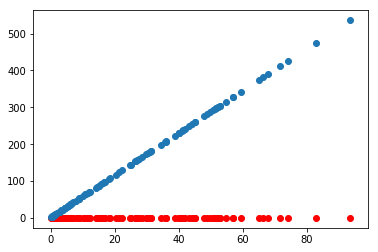

w:0.00022094555622817152, b:4.9944322037538305e-06
loss is 20344.77768327356


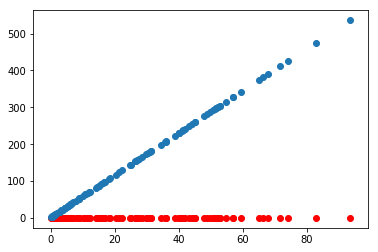

w:0.00022595526934412072, b:5.129169560919705e-06
loss is 20344.74223780706


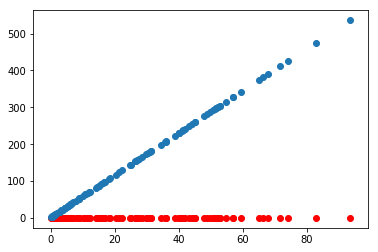

w:0.00023224791652361567, b:5.284663601518584e-06
loss is 20344.697717338513


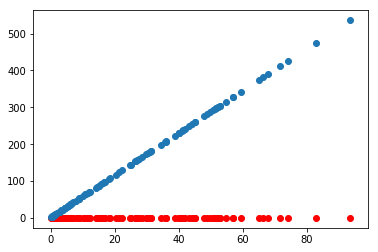

w:0.00023949222588472575, b:5.4431213103246085e-06
loss is 20344.64646715075


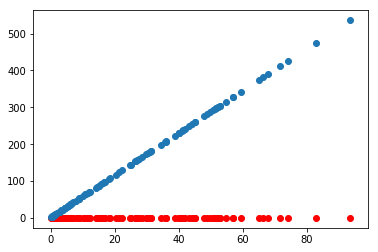

w:0.0002461037446526328, b:5.5930423490674525e-06
loss is 20344.59969289106


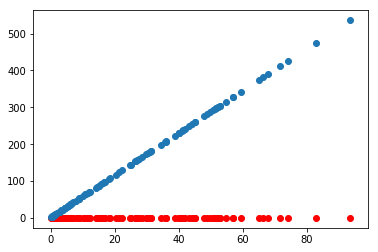

w:0.0002572813537112371, b:5.7960238086925215e-06
loss is 20344.520623139244


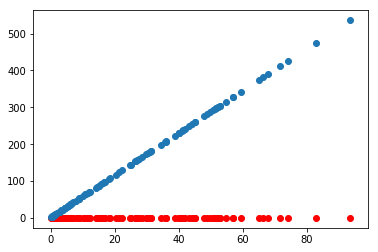

w:0.0002642989535181059, b:5.9547540473854305e-06
loss is 20344.4709762115


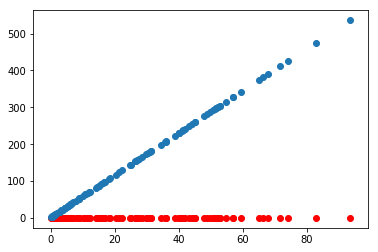

w:0.0002702791166757626, b:6.09717517470193e-06
loss is 20344.42866768853


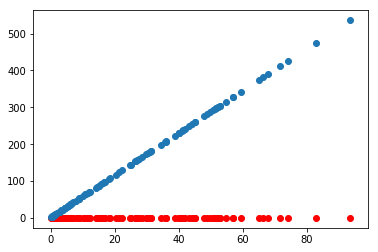

w:0.0002770594967541379, b:6.251998577395227e-06
loss is 20344.380698881025


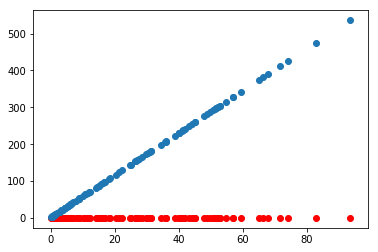

w:0.0002854078666630401, b:6.420494312390372e-06
loss is 20344.321640650756


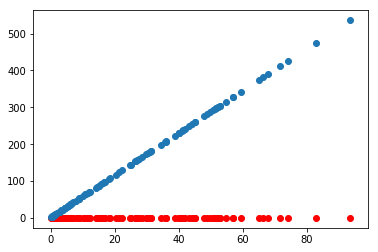

w:0.00029578762031560156, b:6.600782864190981e-06
loss is 20344.24821666692


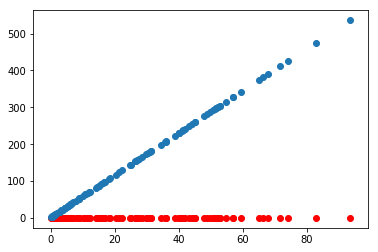

w:0.0003028398450038093, b:6.7618492377612344e-06
loss is 20344.19832487113


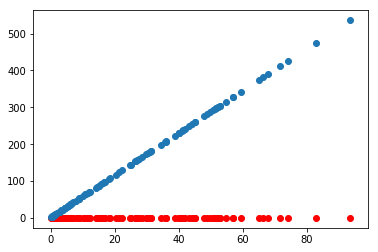

w:0.0003083661667767518, b:6.892508803792505e-06
loss is 20344.159227600267


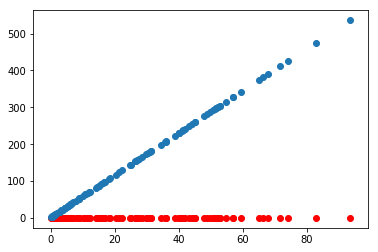

w:0.00031804967922580954, b:7.079193570343197e-06
loss is 20344.090726030718


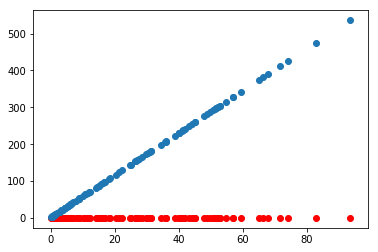

w:0.0003265015440889647, b:7.264676051402806e-06
loss is 20344.030933740232


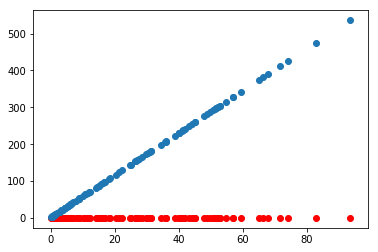

w:0.00033634692736844935, b:7.461592152880805e-06
loss is 20343.9612861932


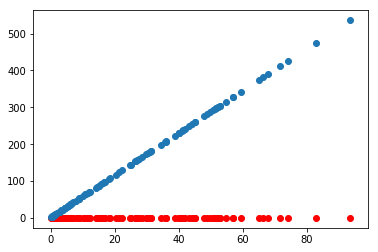

w:0.00034169629341529694, b:7.592551647049148e-06
loss is 20343.923440352988


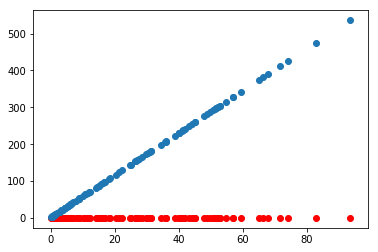

w:0.00034656691871767906, b:7.716756374870165e-06
loss is 20343.888980771346


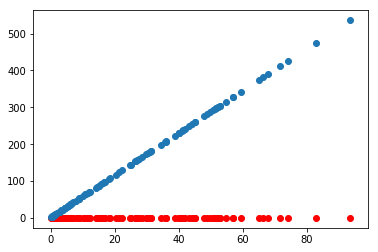

w:0.000351837432228716, b:7.852125645094418e-06
loss is 20343.85169186916


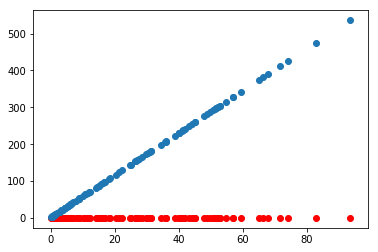

w:0.00035802098778142406, b:7.990344751796951e-06
loss is 20343.807946471206


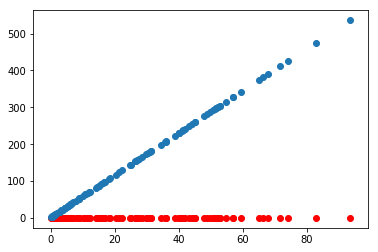

w:0.0003645072691007549, b:8.151457389712079e-06
loss is 20343.762056964966


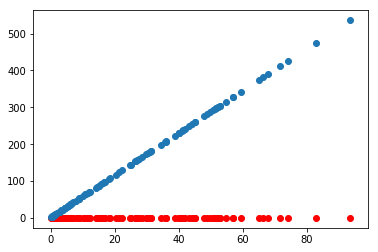

w:0.0003739872964622882, b:8.330628485362538e-06
loss is 20343.69499607494


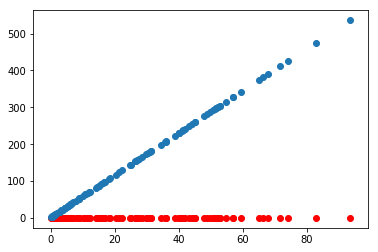

w:0.0003823845152050014, b:8.509692084859292e-06
loss is 20343.635591773178


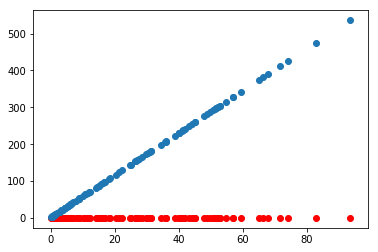

w:0.0003903757135172433, b:8.687753571740148e-06
loss is 20343.579058652642


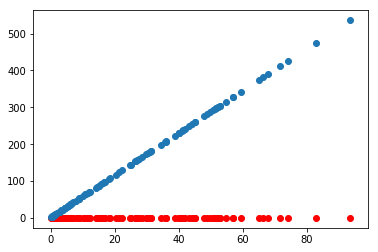

w:0.0003973318951988692, b:8.847999697272223e-06
loss is 20343.52984691764


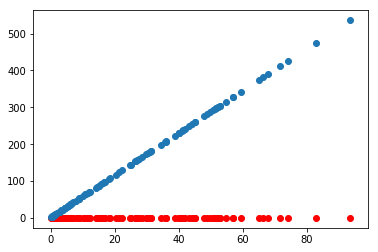

w:0.0004051530995433434, b:9.009551427025626e-06
loss is 20343.47451854801


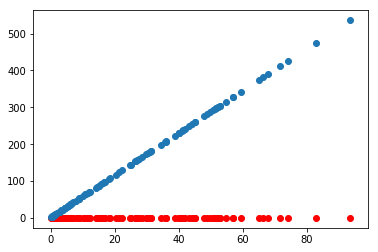

w:0.0004112163156929828, b:9.151902844987436e-06
loss is 20343.43162381337


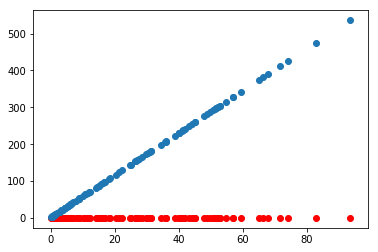

w:0.00041696328998344385, b:9.28602399359241e-06
loss is 20343.390966526757


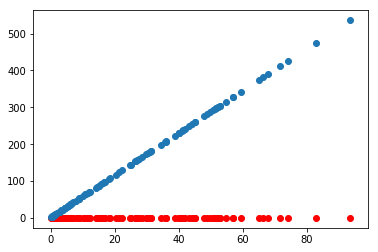

w:0.0004232935873961357, b:9.434122875182222e-06
loss is 20343.346182478337


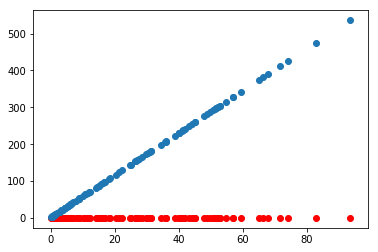

w:0.0004309343571019199, b:9.596087344754031e-06
loss is 20343.292130123144


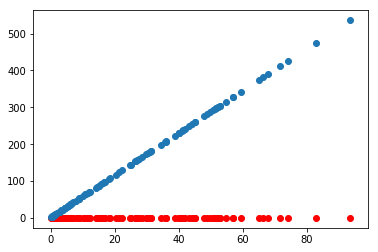

w:0.0004362404609282936, b:9.74239712797419e-06
loss is 20343.25458839503


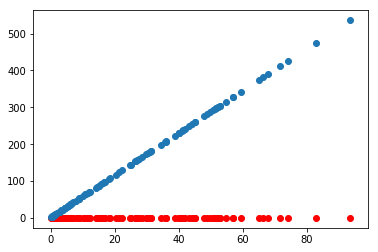

w:0.00044116528049197436, b:9.866015197825002e-06
loss is 20343.219746272243


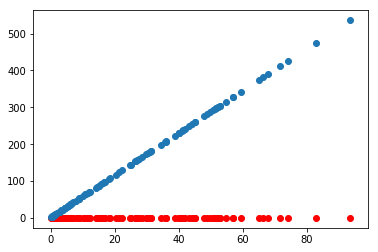

w:0.00044479863796270826, b:9.96985506591347e-06
loss is 20343.194039021506


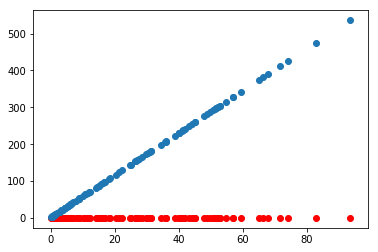

w:0.0004530669049964201, b:1.0143786986646385e-05
loss is 20343.13554805436


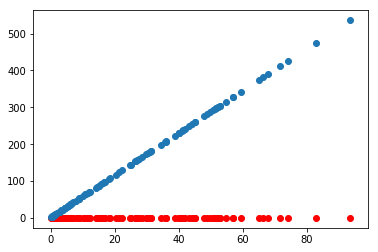

w:0.000458488152135231, b:1.0274179084226972e-05
loss is 20343.097194812082


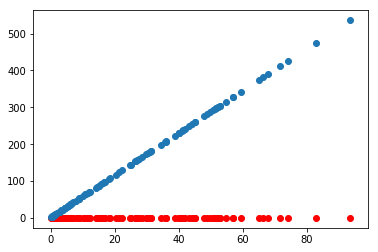

w:0.000463951974424449, b:1.0406967893110288e-05
loss is 20343.05854018788


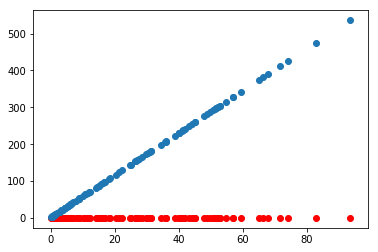

w:0.0004721911095162608, b:1.0576996541632058e-05
loss is 20343.000256015366


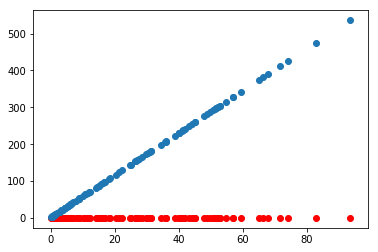

w:0.00047964291000124294, b:1.0745981638119247e-05
loss is 20342.947539181914


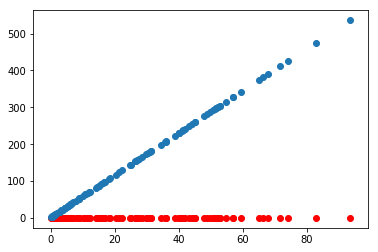

w:0.0004866833743604671, b:1.0902298698432511e-05
loss is 20342.897732882084


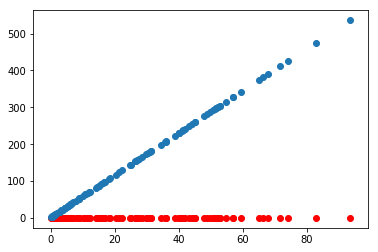

w:0.0004952540546319761, b:1.1078924294269745e-05
loss is 20342.837103617494


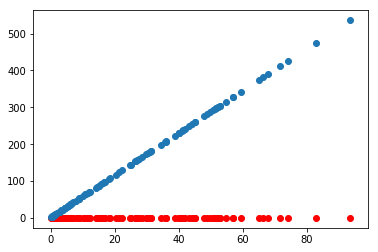

w:0.0005036814252160915, b:1.1252908992913626e-05
loss is 20342.777488169188


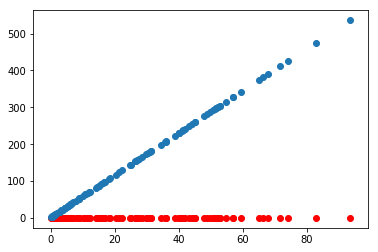

w:0.0005099651433276388, b:1.140460218340494e-05
loss is 20342.733033582954


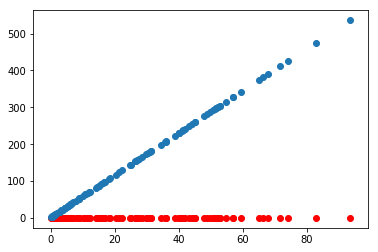

w:0.0005167045180562201, b:1.1556120960198515e-05
loss is 20342.685357232782


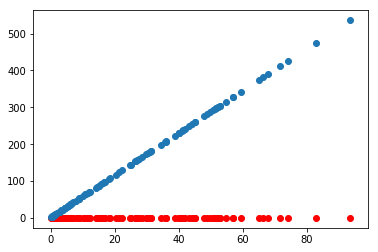

w:0.0005259426570326122, b:1.1748760957177111e-05
loss is 20342.62000633408


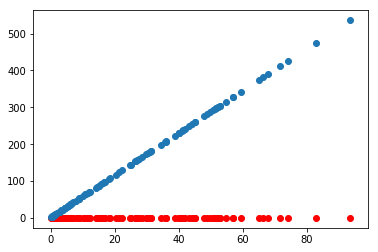

w:0.0005315107906197825, b:1.1875129462169969e-05
loss is 20342.58061561333


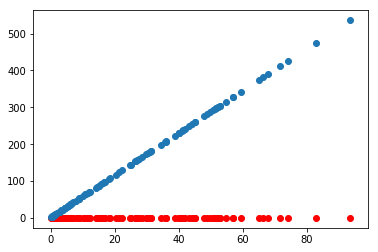

w:0.0005390581731042121, b:1.2046722780263845e-05
loss is 20342.52722307887


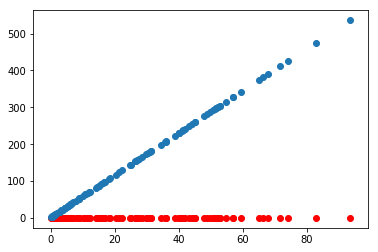

w:0.0005451435872643457, b:1.2187790755514605e-05
loss is 20342.48417258849


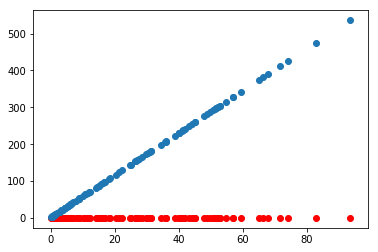

w:0.0005531404213143961, b:1.2360049318200913e-05
loss is 20342.42760213075


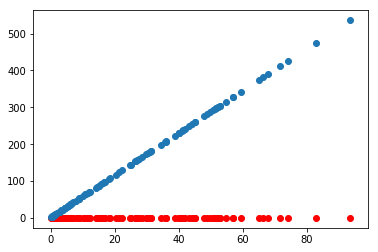

w:0.0005592230566735748, b:1.2516394124710216e-05
loss is 20342.38456899397


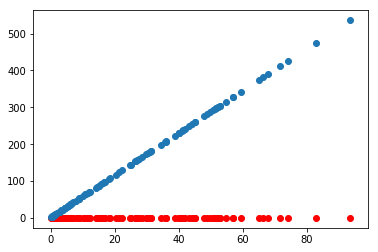

w:0.0005672532506032363, b:1.2682232555330346e-05
loss is 20342.327763805584


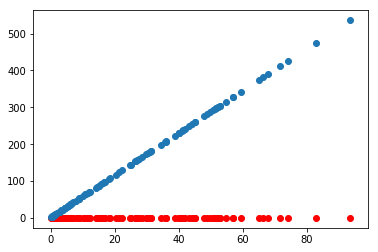

w:0.0005738846747224848, b:1.28256136894342e-05
loss is 20342.28085249424


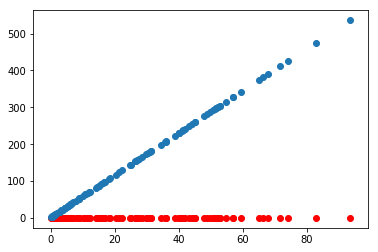

w:0.0005819812309907715, b:1.2998822077332988e-05
loss is 20342.223577065855


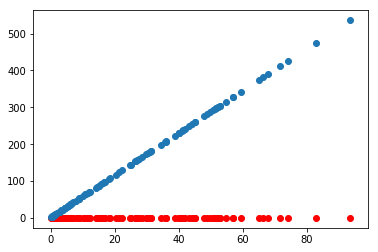

w:0.0005862290813366855, b:1.3119118090338546e-05
loss is 20342.193522978403


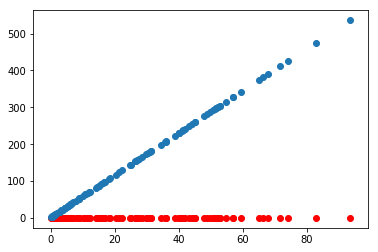

w:0.000590958770284518, b:1.3238226741764957e-05
loss is 20342.160062177132


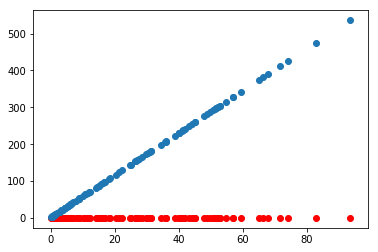

w:0.0005974923001710941, b:1.3386047342539203e-05
loss is 20342.11384253891


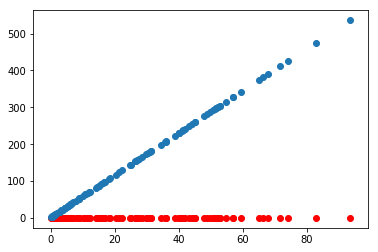

w:0.0006034014599392753, b:1.35194758731289e-05
loss is 20342.07203992023


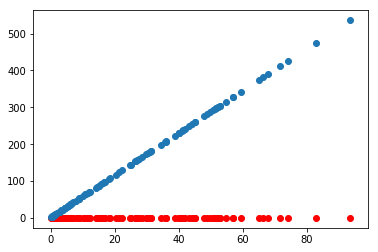

w:0.0006121487685459622, b:1.3699830079934188e-05
loss is 20342.010162424016


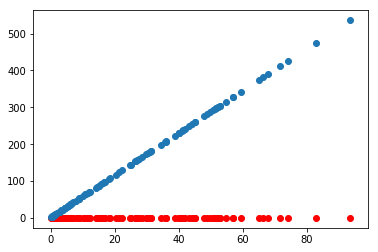

w:0.0006183599421793984, b:1.3844333285030928e-05
loss is 20341.966222741445


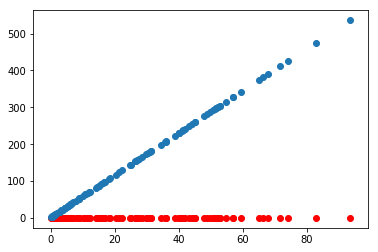

w:0.0006247979036559329, b:1.3992836558123292e-05
loss is 20341.920678945033


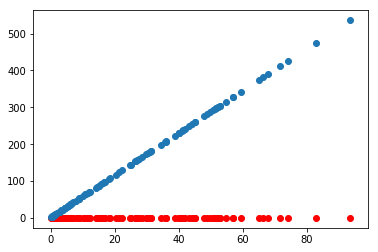

w:0.0006333903622229162, b:1.4170493283000821e-05
loss is 20341.85989698846


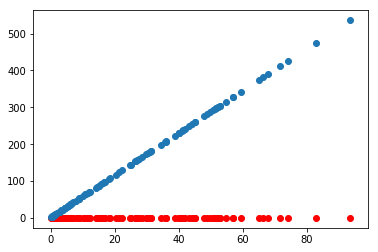

w:0.0006436750479445346, b:1.4354885134338217e-05
loss is 20341.78714899045


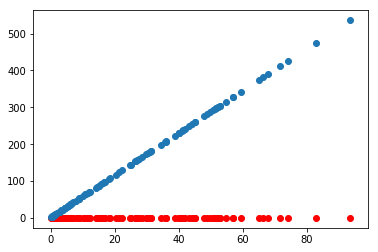

w:0.0006495831296991572, b:1.4497548157348465e-05
loss is 20341.745352878985


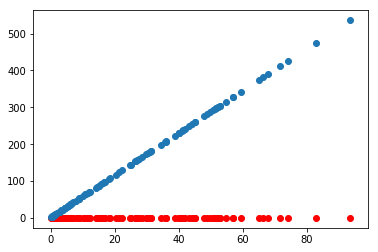

w:0.0006576568555535219, b:1.4672259775105057e-05
loss is 20341.688239392835


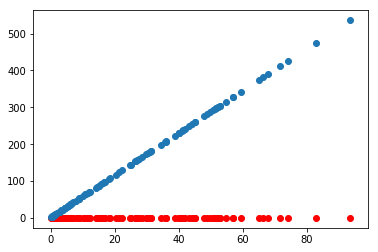

w:0.000663412819706229, b:1.481347485020667e-05
loss is 20341.64751917045


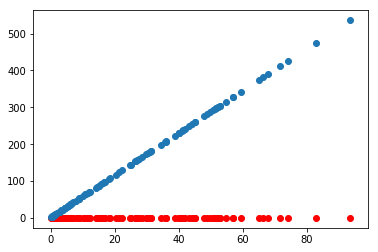

w:0.0006702509321392986, b:1.4972337439059244e-05
loss is 20341.59914480646


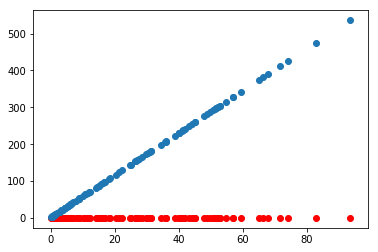

w:0.0006784086444072412, b:1.5146788072184394e-05
loss is 20341.541437735254


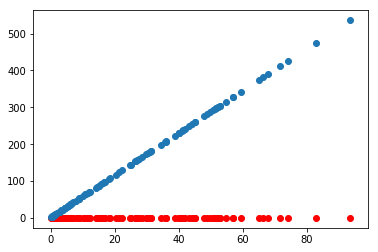

w:0.0006866191435534478, b:1.5325277263634798e-05
loss is 20341.483356879024


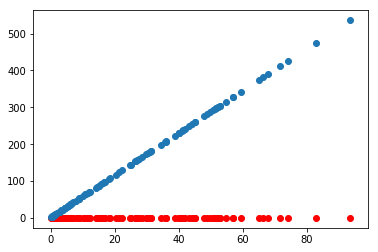

w:0.0006963020499586826, b:1.552466184526118e-05
loss is 20341.414862104742


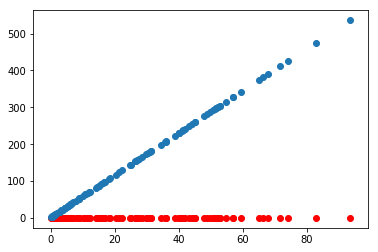

w:0.0007013506464844545, b:1.565906362945409e-05
loss is 20341.379144694016


In [17]:
# lr = 0.000000001   max_iter = 100     下降很慢
if __name__ == '__main__':
    run()

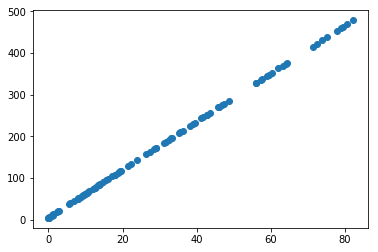

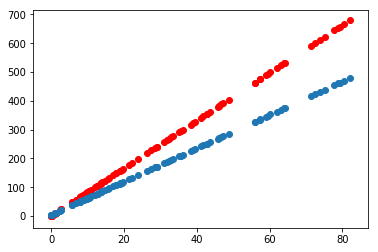

w:8.288355236896015, b:0.17840412913882098
loss is 4099.557739727108


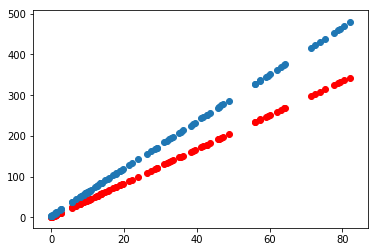

w:4.186082902009605, b:0.09941262718916057
loss is 1989.63186784074


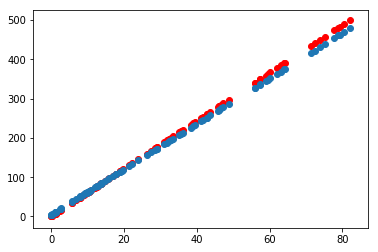

w:6.089137195464751, b:0.14540687885841844
loss is 37.39140656319852


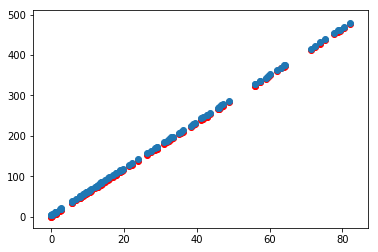

w:5.8017617296991855, b:0.14061365612361565
loss is 6.9481166189644465


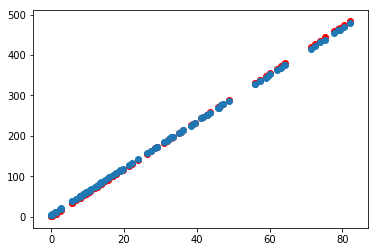

w:5.9002927002878005, b:0.14418677021708953
loss is 4.354628367646662


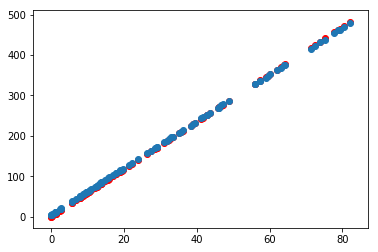

w:5.865880279859907, b:0.14515758950183763
loss is 3.710034148494839


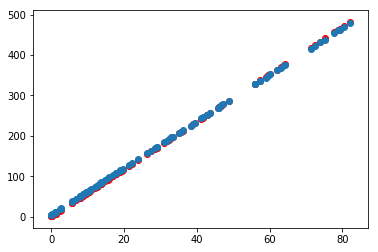

w:5.870131920420301, b:0.14677845118067762
loss is 3.6971116769035945


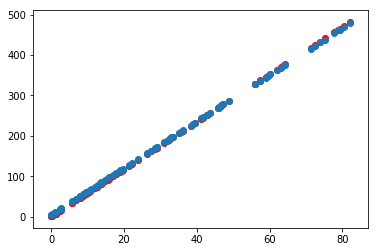

w:5.86743969632265, b:0.1486888632702713
loss is 3.6971394640461086


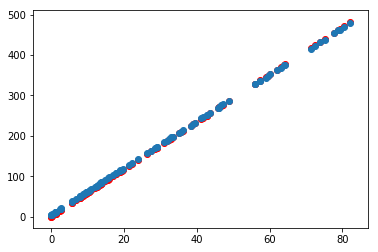

w:5.859880302844958, b:0.15006085850534728
loss is 3.757758356522988


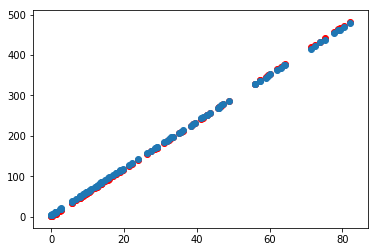

w:5.87256299014706, b:0.15187389854808067
loss is 3.694561528871988


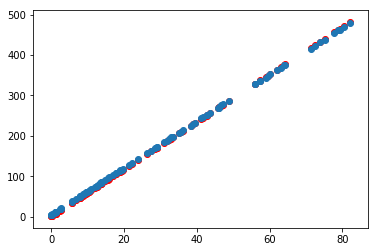

w:5.861349425593576, b:0.15339908555454615
loss is 3.732796681442332


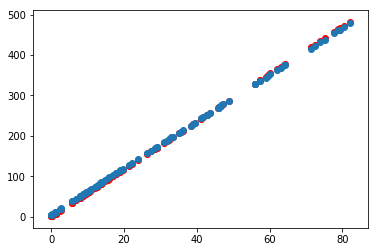

w:5.878573087252745, b:0.15546901142666772
loss is 3.7397807266040193


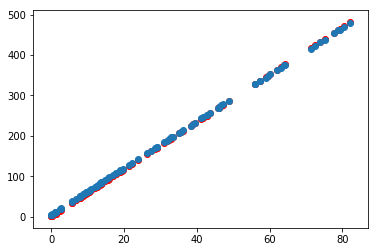

w:5.858284864107375, b:0.1566567079578519
loss is 3.7679624038745483


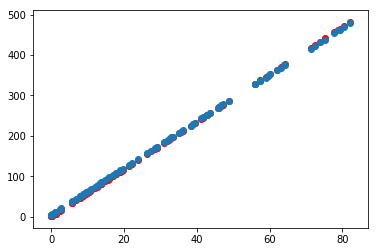

w:5.865733329218018, b:0.15823998439353093
loss is 3.6872184657429212


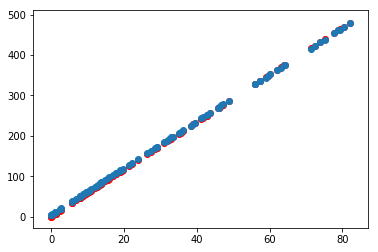

w:5.850453881323813, b:0.15934058987999453
loss is 3.9275723353513183


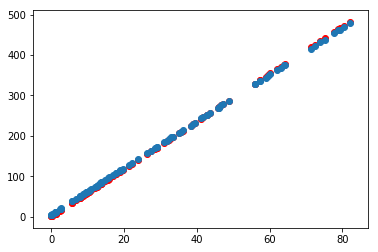

w:5.879916784865773, b:0.1615626541853529
loss is 3.7496372438465624


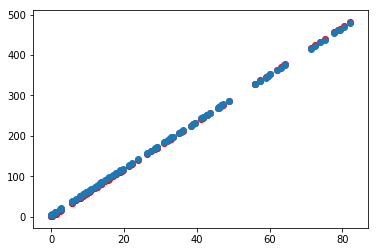

w:5.862016759725142, b:0.16281525566791505
loss is 3.7074968524619574


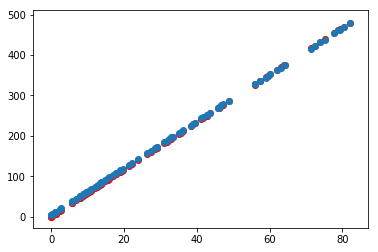

w:5.847004372345423, b:0.16420792069536658
loss is 4.016114045508186


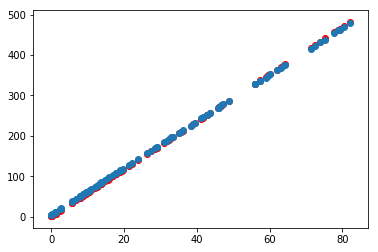

w:5.870296682800737, b:0.16609943157219617
loss is 3.6649932324929138


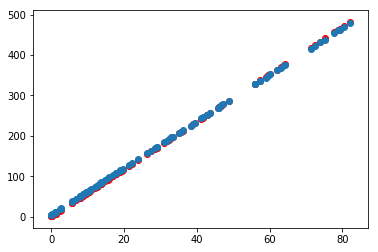

w:5.8688752226562455, b:0.1677120142858184
loss is 3.661656094147734


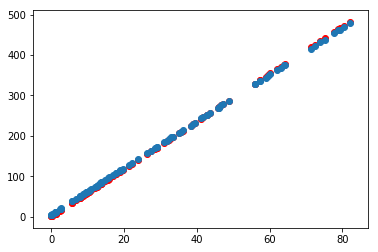

w:5.879594809117131, b:0.1694945559983328
loss is 3.733932753711766


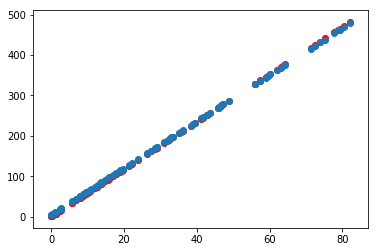

w:5.867032924707287, b:0.17114530207772438
loss is 3.6589954903949247


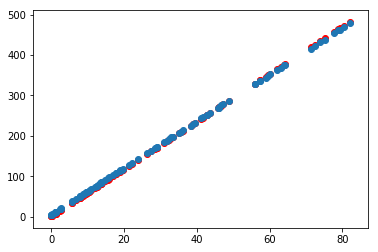

w:5.87515559171196, b:0.17305611013210287
loss is 3.6778490299301994


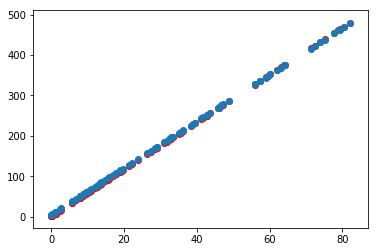

w:5.846344992156266, b:0.1742615125823752
loss is 4.013399085016087


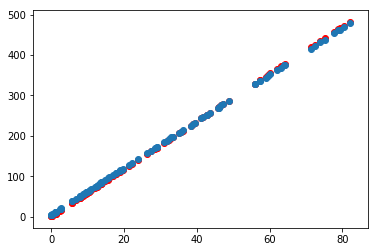

w:5.881115514723581, b:0.17653596797109514
loss is 3.748213087479434


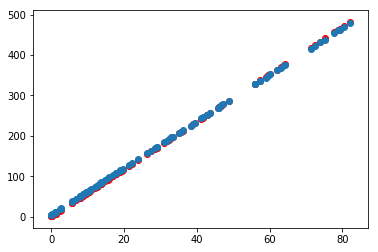

w:5.8693501971446125, b:0.17788301779173152
loss is 3.64447875311005


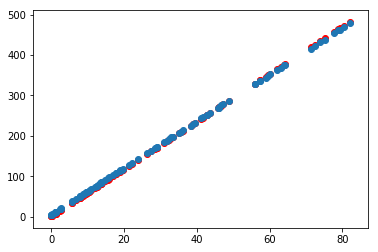

w:5.874854243346449, b:0.17997509398648087
loss is 3.664882526738401


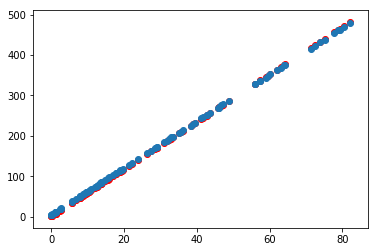

w:5.860096409441907, b:0.1811870772127796
loss is 3.6940020570263075


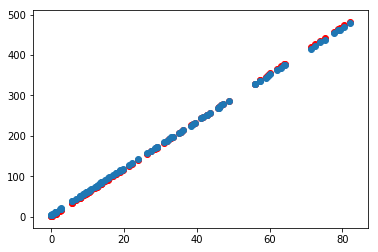

w:5.887079411768039, b:0.18356287998279064
loss is 3.8654981646920175


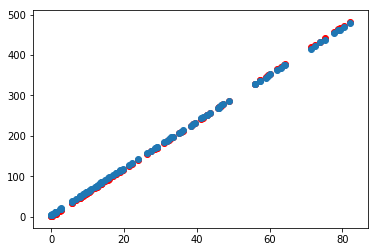

w:5.872361451106759, b:0.18455755040821537
loss is 3.6415486516922546


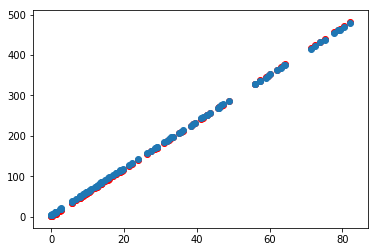

w:5.861950041634448, b:0.18608058301225486
loss is 3.6641608801321373


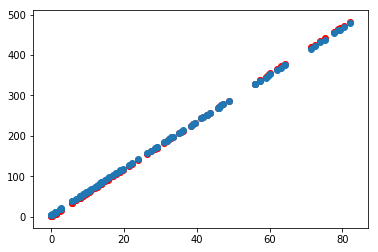

w:5.88133370414537, b:0.1880670379518402
loss is 3.736665316851873


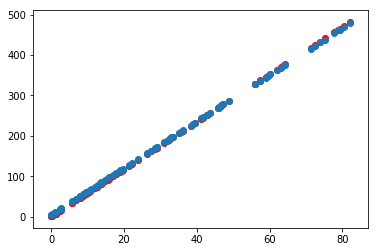

w:5.86644231011803, b:0.18930657648848132
loss is 3.6291162559153713


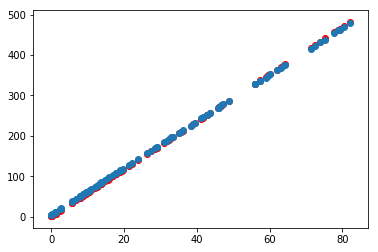

w:5.867824994903349, b:0.19066897385184112
loss is 3.6235548589168878


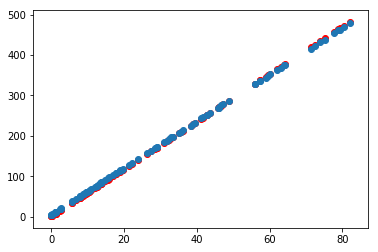

w:5.874119086358186, b:0.1924439082515489
loss is 3.6401807124236747


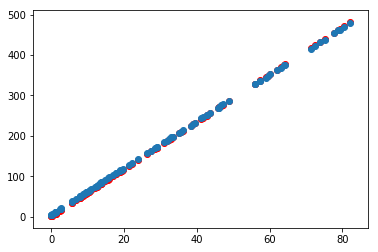

w:5.859757759006914, b:0.19392875169644203
loss is 3.6735377556310596


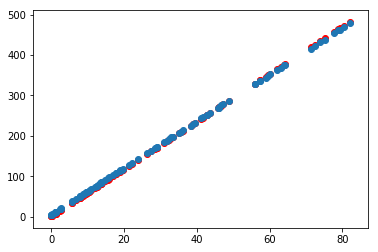

w:5.874289722531141, b:0.19602805578279844
loss is 3.636054412297604


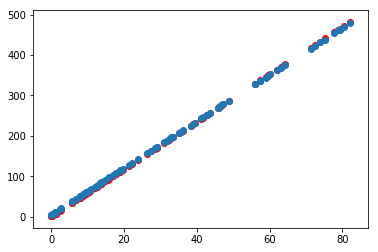

w:5.869610750373601, b:0.19783303736468583
loss is 3.611579226986698


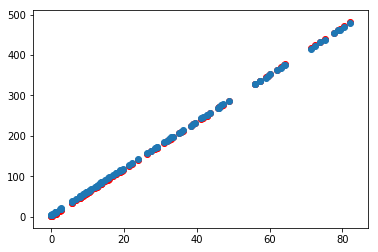

w:5.858032730576859, b:0.19922821411411623
loss is 3.686722723851324


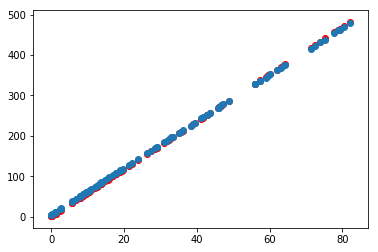

w:5.868578243654973, b:0.20092268209080894
loss is 3.6057308640021466


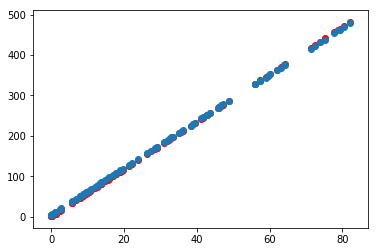

w:5.862354847489289, b:0.2021698851198475
loss is 3.6304133742629268


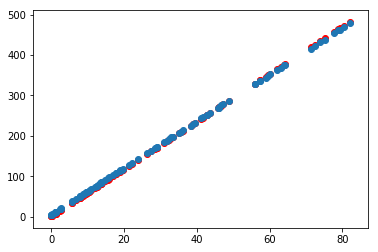

w:5.872631665201202, b:0.2038374168466796
loss is 3.612766538470855


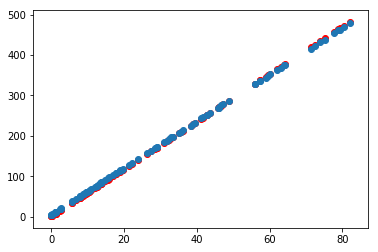

w:5.875797915941074, b:0.20561846875022452
loss is 3.6354643384841374


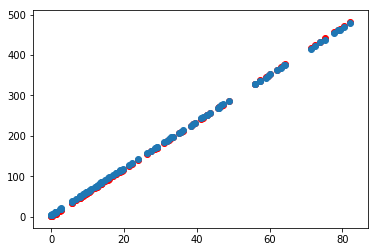

w:5.865187058535447, b:0.2070992171338105
loss is 3.602792806713479


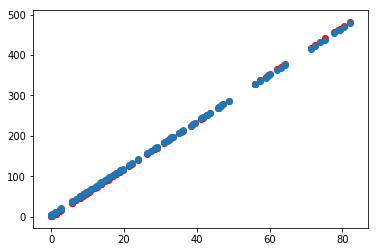

w:5.871099663490243, b:0.2086271689907359
loss is 3.597919109754015


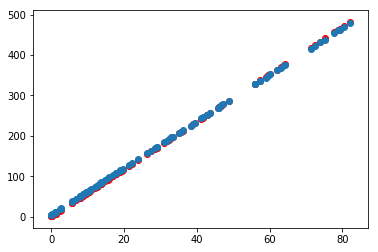

w:5.867262722962656, b:0.210171697757751
loss is 3.591127256389594


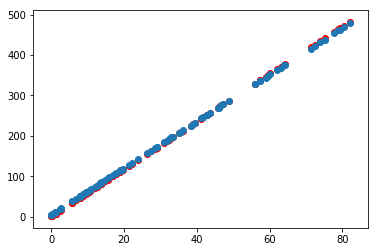

w:5.878546316882448, b:0.21215907042714588
loss is 3.6599336931171655


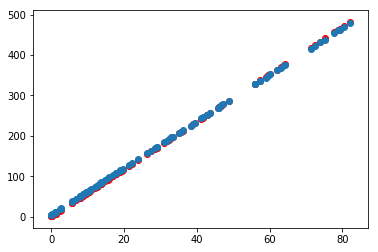

w:5.868103937925979, b:0.21405271963085618
loss is 3.583807159775205


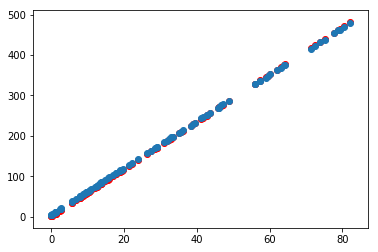

w:5.859391473878375, b:0.21562846509343642
loss is 3.636210538874887


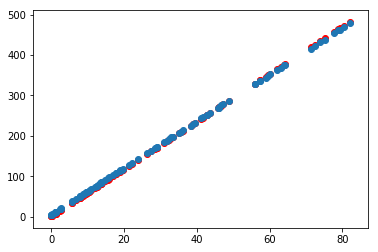

w:5.873010354051803, b:0.2177626767111524
loss is 3.5936679262609452


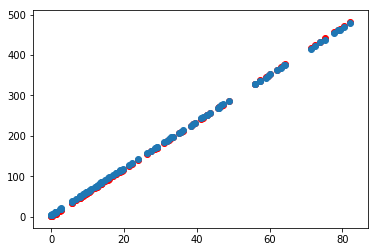

w:5.863755009777955, b:0.21943008688944118
loss is 3.5885331737471455


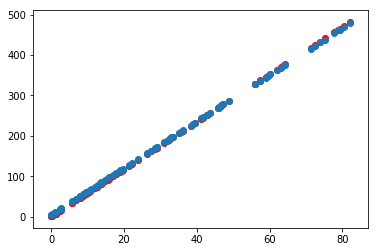

w:5.866377523177075, b:0.2211710040759848
loss is 3.5741023748127128


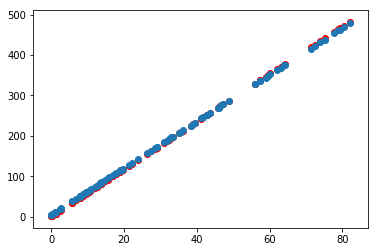

w:5.878101327700544, b:0.2229806852666925
loss is 3.6387603014641177


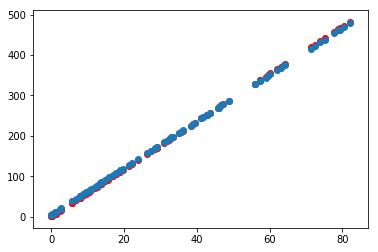

w:5.878993137070292, b:0.22485879760887617
loss is 3.649253623020075


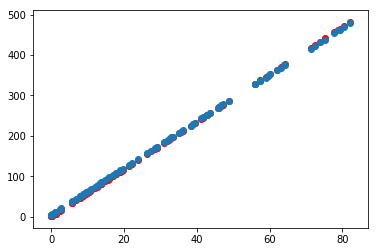

w:5.861621147565847, b:0.22619286420452986
loss is 3.592409241666968


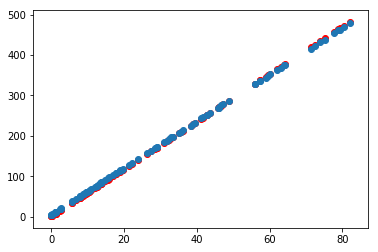

w:5.872164664896502, b:0.2282896231106324
loss is 3.5721996915373535


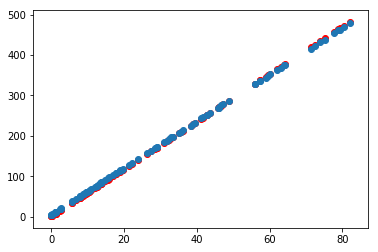

w:5.87463229554443, b:0.22999562409073498
loss is 3.5883362382997683


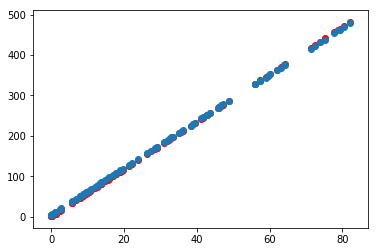

w:5.862678032206822, b:0.23135885493161257
loss is 3.5743057840418806


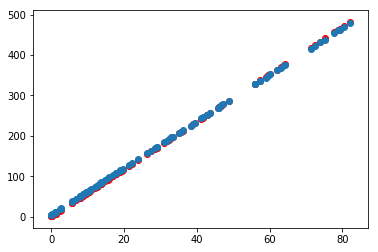

w:5.866614709771184, b:0.23344100878040636
loss is 3.5526415680823287


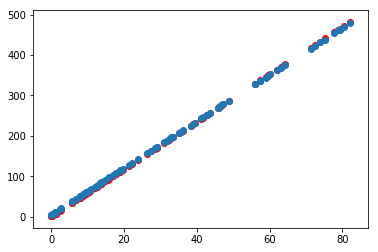

w:5.867444851461108, b:0.23520865115498388
loss is 3.5486805721157926


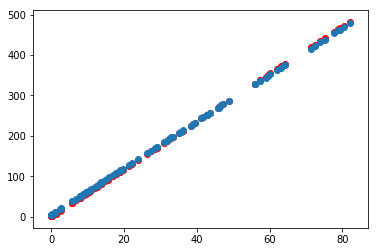

w:5.881040311158472, b:0.2372334000825447
loss is 3.667603274056289


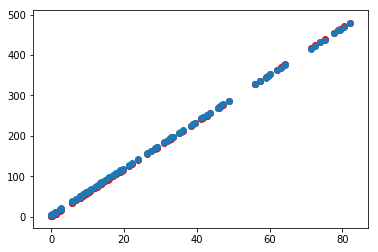

w:5.856083263311583, b:0.2384623498306345
loss is 3.6390537843994535


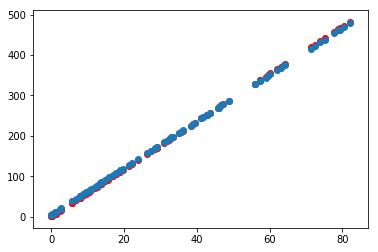

w:5.878057351562233, b:0.24046343189814479
loss is 3.6142172491820603


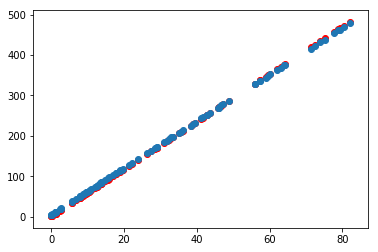

w:5.872386912697396, b:0.2420324340518505
loss is 3.5525108876292877


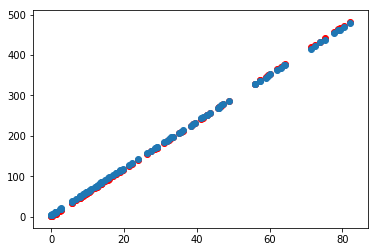

w:5.871089895012605, b:0.24353018889462272
loss is 3.5428727140829266


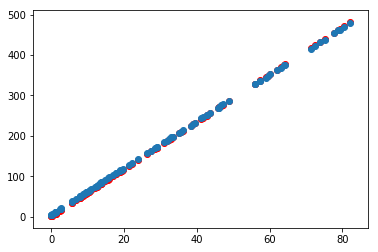

w:5.858902748125199, b:0.24520745042087475
loss is 3.585519987103857


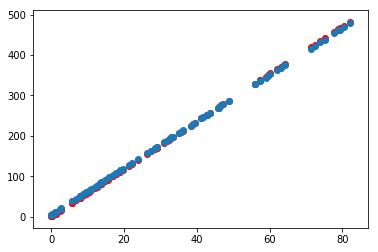

w:5.87858145849637, b:0.24740871213289845
loss is 3.612655512592242


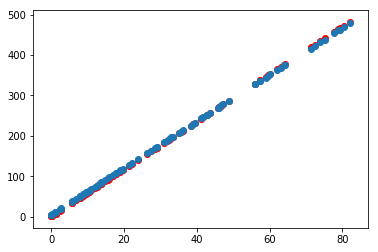

w:5.875903546519875, b:0.2489460991571343
loss is 3.5743575630841167


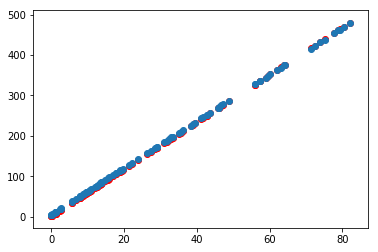

w:5.842298555403979, b:0.24973569159962497
loss is 3.970905818653573


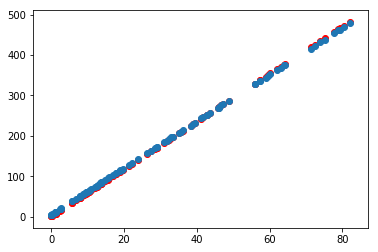

w:5.8776756807233665, b:0.2520210000136965
loss is 3.5930329412009434


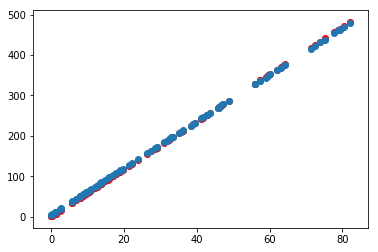

w:5.869922174430191, b:0.2536641527440082
loss is 3.5221753253557297


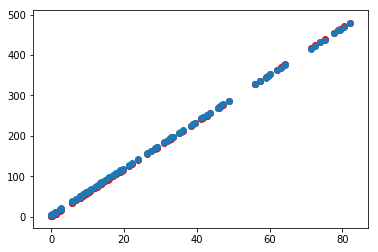

w:5.855329951852179, b:0.25457362152769547
loss is 3.619379663460289


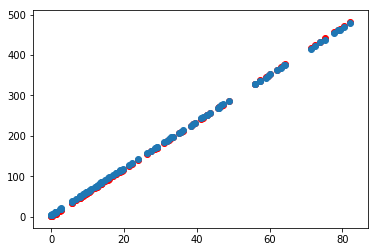

w:5.863124753450612, b:0.2562384574865929
loss is 3.5266504873003504


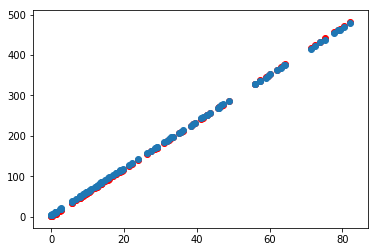

w:5.863103587755469, b:0.25793173772194944
loss is 3.5237704180468494


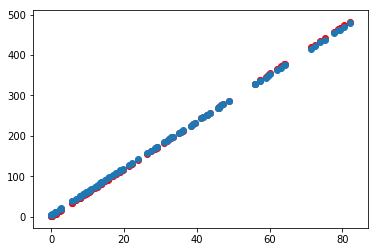

w:5.8827998272679505, b:0.2599792050739371
loss is 3.674711704972452


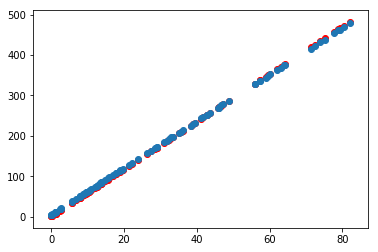

w:5.875524270964257, b:0.2613880996935202
loss is 3.5523854182617565


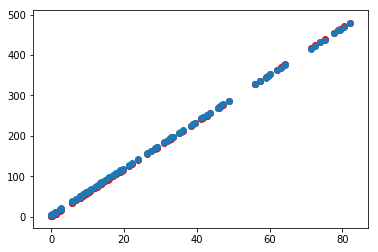

w:5.855960492795914, b:0.26250292239564843
loss is 3.593244438976811


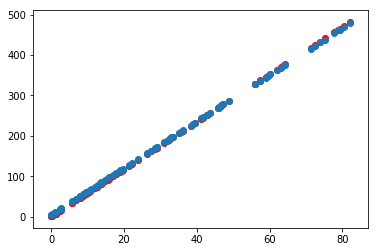

w:5.864937930431798, b:0.26424366845057456
loss is 3.5042781189811887


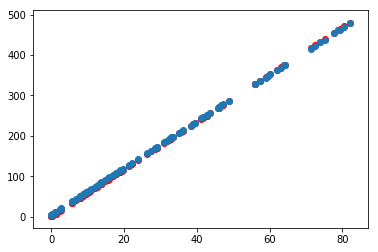

w:5.854790043181977, b:0.2657592994632132
loss is 3.606220872135099


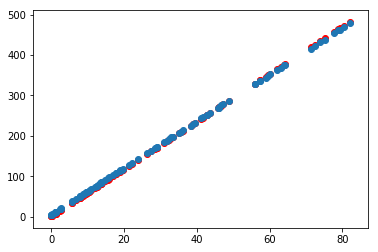

w:5.8735830360830965, b:0.2679605505811344
loss is 3.523088653370172


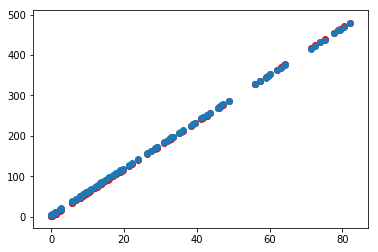

w:5.855580974085396, b:0.26893698018588424
loss is 3.5865902567731616


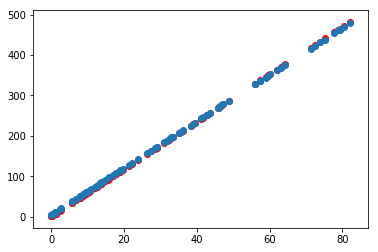

w:5.867098293288144, b:0.27066857116238946
loss is 3.489932327548305


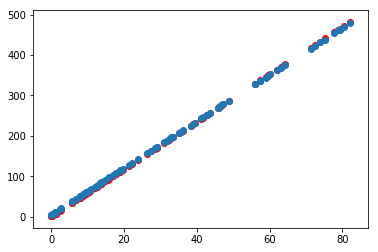

w:5.865746973871467, b:0.2723788154318049
loss is 3.4883750967491447


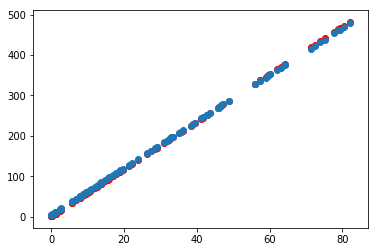

w:5.874144652590238, b:0.27426845525203347
loss is 3.5192430186515047


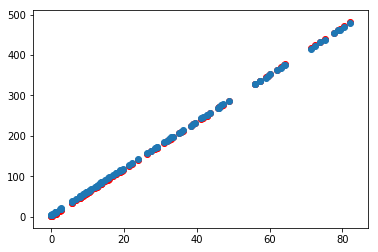

w:5.856804476695748, b:0.2756181472226045
loss is 3.5548277906856907


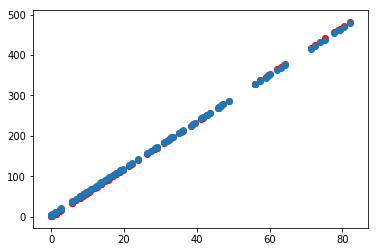

w:5.86988196629829, b:0.2774752261020206
loss is 3.4846185640920235


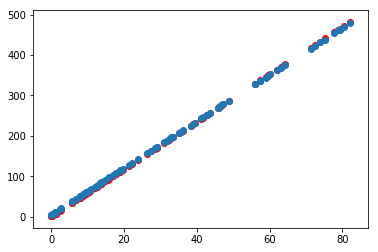

w:5.86606982959859, b:0.2790241634862519
loss is 3.4767327186501116


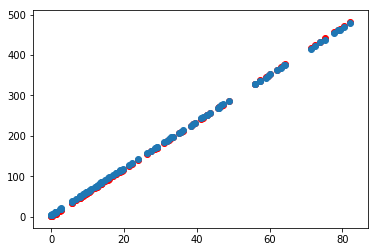

w:5.863550536054002, b:0.28081004991317793
loss is 3.481170731416082


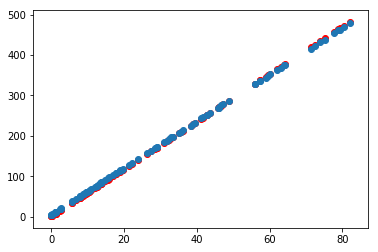

w:5.871473366214631, b:0.2825399743407767
loss is 3.4851957339808313


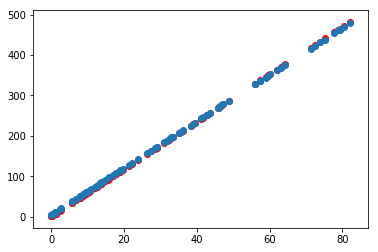

w:5.867522273054633, b:0.2839770898437705
loss is 3.468375769897045


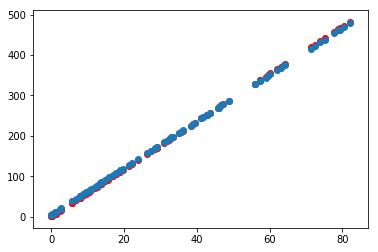

w:5.877537987817308, b:0.28562217482846
loss is 3.545836941716609


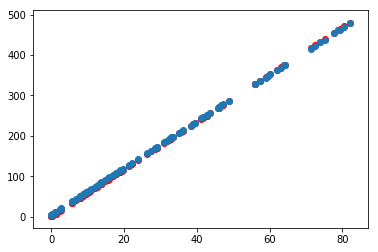

w:5.854337891622447, b:0.28652135632233267
loss is 3.5724820350353115


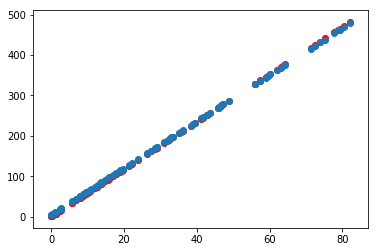

w:5.864422813886447, b:0.28861844751129184
loss is 3.4642419959952617


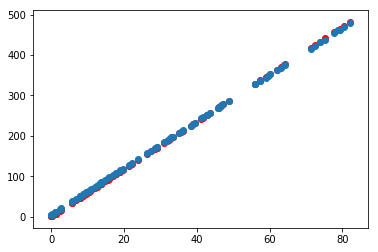

w:5.864802965030438, b:0.29026138415754466
loss is 3.4603196237340126


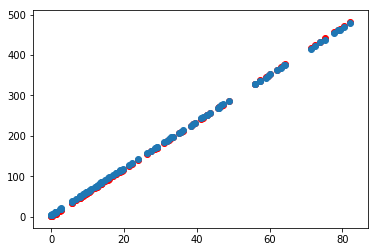

w:5.862290493384761, b:0.2919556208139358
loss is 3.4684794008620536


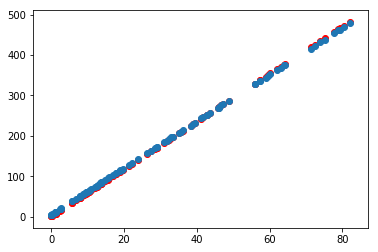

w:5.8764965346213, b:0.29376073862082885
loss is 3.5199292672249696


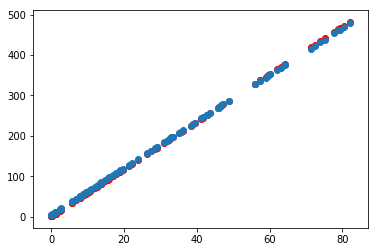

w:5.872492653641157, b:0.2956013250224771
loss is 3.47324624302835


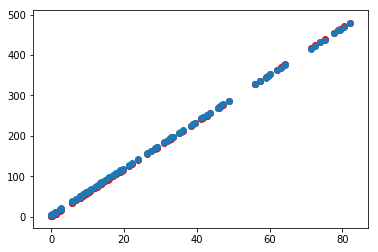

w:5.855452498863988, b:0.29687778472680054
loss is 3.533587549850014


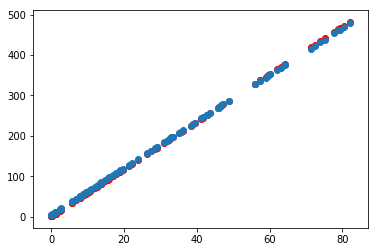

w:5.872915171057034, b:0.2994288053269648
loss is 3.4712945233405397


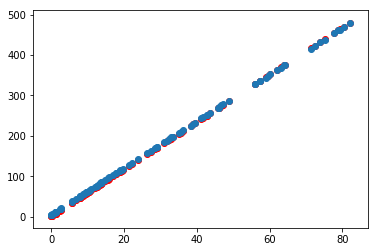

w:5.847674133741457, b:0.30030675334177187
loss is 3.689596897215412


In [19]:
# lr = 0.001   max_iter = 100     下降很慢
if __name__ == '__main__':
    run()

# 总结

1. 从上图计算可以看出，预测出来的直线跟真实的散点数据越来越吻合
2. 学习率对迭代速度影响非常大
3. 有个比较奇怪的现象是，在学习率为0.0001，梯度缓慢下降，逼近原数据点；但增大到学习率为0.001时，梯度则反复在某一个点来回振荡，但是符号不变
自己解答：这是概念理解错误，梯度振荡是指 $$\frac{\partial J}{\partial \theta}$$ 的符号改变，而不是$$\theta$$改变，而由于$$\theta=\theta-\alpha\frac{\partial J}{\partial \theta}$$,所以表现出来的就可能是斜率$$\theta$$反复在某一个点振荡，与改不改变符合无关